In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import re
import numpy as np
from sklearn import metrics
import optuna
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import f1_score
from scipy.sparse import hstack
from sklearn.utils import resample
import optuna
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from huggingface_hub import hf_hub_download
from safetensors.numpy import load_file
from gensim.models import Word2Vec
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\didia\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\didia\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "c:\Users\didia\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "c:\Users\didia\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\didia\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\didia\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "c:\Users\didia\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "c:\Users\didia\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found

In [7]:
#carregar dataset
df = pd.read_csv('factnews_dataset.csv')
df.isnull().sum()

file          0
id_sente      0
id_article    0
domain        0
year          0
sentences     0
classe        0
dtype: int64

# Pré-processamento

divisão dos dados

In [8]:

#criar grupo treino, validação e teste
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['classe'])
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['classe'])

#guardar conjuntos em memória
train_df.to_csv("train.csv", index=False) 
val_df.to_csv("val.csv", index=False)
test_df.to_csv("test.csv", index=False)


In [3]:
train= pd.read_csv('train.csv')
val= pd.read_csv('val.csv')
test= pd.read_csv('test.csv')
train_oversampling= pd.read_csv('train_oversampling.csv')

y_train= train['classe']
y_train_oversampling= train_oversampling['classe']

y_val=val['classe']

y_test= test['classe']

Pré-processamento da primeira meta 

In [110]:
df = pd.read_csv('factnews_dataset.csv')
def pre_processamento_meta1(df):
    stop_words = set(stopwords.words('portuguese'))
    #criar coluna tokens
    df['tokens'] = df['sentences'].apply(lambda x: nltk.word_tokenize(str(x).lower()))
    # Tokenizar sem stopwords
    df['tokens'] = df['tokens'].apply(lambda toks: [t for t in toks if t not in stop_words])
    return df

train_meta1 = pre_processamento_meta1(train)
val_meta1 = pre_processamento_meta1(val)
test_meta1= pre_processamento_meta1(test)

y_train_meta1=train_meta1['classe']
y_val_meta1=val_meta1['classe']
y_test_meta1=test_meta1['classe']

balanceamento dos dados

In [111]:
train= pd.read_csv('train.csv')
val= pd.read_csv('val.csv')
test= pd.read_csv('test.csv')


train_oversampling= pd.read_csv('train_oversampling.csv')

y_train= train['classe']
y_train_oversampling= train_oversampling['classe']

y_val=val['classe']

y_test= test['classe']


In [9]:
# Contagem das classes em cada conjunto
print ("conjunto de treino: ",y_train.value_counts().sort_index())
print("\nconjunto de validação: ",y_val.value_counts().sort_index())
print("\nconjunto de teste: ", y_test.value_counts().sort_index())

print("\nconjunto de treino + exemplos: ", y_train_oversampling.value_counts().sort_index())

conjunto de treino:  classe
-1     779
 0    2375
 1     312
Name: count, dtype: int64

conjunto de validação:  classe
-1    195
 0    594
 1     78
Name: count, dtype: int64

conjunto de teste:  classe
-1     417
 0    1273
 1     168
Name: count, dtype: int64

conjunto de treino + exemplos:  classe
-1    2969
 0    2969
 1    2969
Name: count, dtype: int64


In [113]:
def balancear_classes(conjunto):
  # Separar cada classe
  class_min = conjunto[conjunto['classe'] == -1]
  class_med = conjunto[conjunto['classe'] == 1]
  class_max = conjunto[conjunto['classe'] == 0]

  # Número da classe maior
  n_samples = len(class_max)

  # Replicar as classes menores até o tamanho da maior
  class_min_upsampled = resample(class_min, 
                              replace=True, 
                              n_samples=n_samples, 
                              random_state=42)

  class_med_upsampled = resample(class_med, 
                              replace=True, 
                              n_samples=n_samples, 
                            random_state=42)

  conjunto_oversampled = pd.concat([class_min_upsampled, class_med_upsampled, class_max])

  # baralhar o conjunto 
  conjunto_oversampled = conjunto_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)

  print(conjunto_oversampled['classe'].value_counts())

  return conjunto_oversampled

#train_oversampling = balancear_classes(train)
#train_oversampling.to_csv('train_oversampling.csv')

tokeinização

In [114]:
stop_words = set(stopwords.words('portuguese'))
def tokeinizar(train, val, test, train_oversampling):
    #criar coluna tokens
    train['tokens'] = train['sentences'].apply(lambda x: nltk.word_tokenize(str(x)))
    val['tokens']   = val['sentences'].apply(lambda x: nltk.word_tokenize(str(x)))
    test['tokens'] = test['sentences'].apply(lambda x: nltk.word_tokenize(str(x)))
    train_oversampling['tokens'] = train_oversampling['sentences'].apply(lambda x: nltk.word_tokenize(str(x)))

    #remover stopwords
    train['tokens'] = train['tokens'].apply(lambda toks: [t for t in toks if t.lower() not in stop_words])
    val['tokens']   = val['tokens'].apply(lambda toks: [t for t in toks if t.lower() not in stop_words])
    test['tokens']  = test['tokens'].apply(lambda toks: [t for t in toks if t.lower() not in stop_words])
    train_oversampling['tokens'] = train_oversampling['tokens'].apply(lambda toks: [t for t in toks if t.lower() not in stop_words])

    #matizar
    #nltk . download ('rslp')
    stemmer = nltk . stem . RSLPStemmer ()
    train['stems'] = train['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
    val['stems']   = val['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
    test['stems'] = test['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
    train_oversampling['stems'] = train_oversampling['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

    nltk . download ('rslp')
    stemmer = nltk . stem . RSLPStemmer ()
    print(train['stems'].head())

    return train, val, test, train_oversampling

train, val, test, train_oversampling = tokeinizar(train, val, test, train_oversampling)

0    [acord, minist, defês, ,, prim, etap, obr, ,, ...
1    [gusttav, leonard, ,, mei, represent, ,, doi, ...
2                        in, ,, kak, tent, nov, .]
3      [profes, universitár, colun, divers, public, .]
4    [além, diss, ,, 900, caminhões-pip, cheg, cond...
Name: stems, dtype: object


[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\didia\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [115]:
y_train= train['classe']
y_train_oversampling= train_oversampling['classe']

y_val=val['classe']

y_test= test['classe']

In [116]:
optuna.logging.set_verbosity(optuna.logging.CRITICAL)


# Construção dos modelos de representação

## TF-IDF - fred

In [117]:
def objective_tfidf(trial):
    # Parâmetros a otimizar
    max_features = trial.suggest_int("max_features", 500, 5000)
    ngram_min = trial.suggest_int("ngram_min", 1, 2)
    ngram_max = trial.suggest_int("ngram_max", ngram_min, 3) 

    tfidf_vect = TfidfVectorizer(
        ngram_range=(ngram_min, ngram_max),
        max_features=max_features,
        strip_accents='unicode',
        token_pattern=r"(?u)\b\w+\b|[^\w\s]"
    )

    text_train = train['stems'].apply(lambda tokens: ' '.join(tokens))
    text_val = val['stems'].apply(lambda tokens: ' '.join(tokens))

    X_train = tfidf_vect.fit_transform(text_train)
    X_val = tfidf_vect.transform(text_val)

    y_train = train['classe']
    y_val = val['classe']

    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)

    score = f1_score(y_val, preds, average='macro')
    return score

def tfidf_optuna(train, val, test):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective_tfidf, n_trials=30)

    best_params = study.best_params
    print("Melhores parâmetros:", best_params)

    tfidf_vect = TfidfVectorizer(
        ngram_range=(best_params['ngram_min'], best_params['ngram_max']),
        max_features=best_params['max_features'],
        strip_accents='unicode',
        token_pattern=r"(?u)\b\w+\b|[^\w\s]"
    )

    text_train = train['stems'].apply(lambda tokens: ' '.join(tokens))
    text_val = val['stems'].apply(lambda tokens: ' '.join(tokens))
    text_test = test['stems'].apply(lambda tokens: ' '.join(tokens))

    X_train = tfidf_vect.fit_transform(text_train)
    X_val = tfidf_vect.transform(text_val)
    X_test = tfidf_vect.transform(text_test)

    return X_train, X_val, X_test


In [118]:
X_train_oversampling_tfidf_vec, X_val_tfidf_vec_over,X_test_tfidf_vec_over= tfidf_optuna(train_oversampling, val, test)
X_train_tfidf_vec, X_val_tfidf_vec, X_test_tfidf_vec= tfidf_optuna(train,val, test)

Melhores parâmetros: {'max_features': 2321, 'ngram_min': 1, 'ngram_max': 1}
Melhores parâmetros: {'max_features': 2220, 'ngram_min': 1, 'ngram_max': 1}


## CountVectorizer -didi

In [119]:
def objective_count_vec(trial, conj_train, conj_val):
    # Parâmetros a otimizar
    max_features = trial.suggest_int("max_features", 500, 5000)
    ngram_min = trial.suggest_int("ngram_min", 1, 2)
    ngram_max = trial.suggest_int("ngram_max", ngram_min, 3)  # garante ngram_max >= ngram_min

    # CountVectorizer com parâmetros sugeridos
    c_vect = CountVectorizer(
        token_pattern=r"(?u)\b\w+\b|[^\w\s]",
        ngram_range=(ngram_min, ngram_max),
        strip_accents='unicode',
        max_features=max_features
    )

    # Transformar textos
    text_train = conj_train['stems'].apply(lambda tokens: ' '.join(tokens))
    text_val   = conj_val['stems'].apply(lambda tokens: ' '.join(tokens))

    X_train = c_vect.fit_transform(text_train)
    X_val   = c_vect.transform(text_val)

    y_train = conj_train['classe'] 
    y_val   = conj_val['classe']

    # Treinar Logistic Regression
    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)

    # Métrica: F1 macro
    score = f1_score(y_val, preds, average='macro')
    return score 

def count_vec(train, val, test):

    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective_count_vec(trial, train,val),
                   n_trials=30, n_jobs=-1, show_progress_bar=False)
    
    best_params=study.best_params
    print("Melhores parâmetros:", study.best_params)
    print("Melhor F1:", study.best_value)
    
    c_vect = CountVectorizer(
        token_pattern=r"(?u)\b\w+\b|[^\w\s]",
        ngram_range=(best_params['ngram_min'], best_params['ngram_max']),
        strip_accents='unicode',
        max_features=best_params['max_features']
    )

    # Transformar textos
    text_train = train['stems'].apply(lambda tokens: ' '.join(tokens))
    text_val = val['stems'].apply(lambda tokens: ' '.join(tokens))
    text_test = test['stems'].apply(lambda tokens: ' '.join(tokens))

    # Fit no treino, transform nos outros conjuntos
    X_train = c_vect.fit_transform(text_train)
    X_val = c_vect.transform(text_val)
    X_test = c_vect.transform(text_test)

    return X_train, X_val, X_test

In [120]:
X_train_oversampling_count_vec, X_val_count_vec_over , X_test_count_vec_over= count_vec(train_oversampling, val, test)
X_train_count_vec, X_val_count_vec, X_test_count_vec = count_vec(train, val, test)

Melhores parâmetros: {'max_features': 4314, 'ngram_min': 1, 'ngram_max': 1}
Melhor F1: 0.9919654010894422
Melhores parâmetros: {'max_features': 4998, 'ngram_min': 1, 'ngram_max': 2}
Melhor F1: 0.9751944172151426


## Glove -fred

In [121]:
glove = KeyedVectors.load_word2vec_format('glove_s100.txt')

def vetor_frase_glove(tokens):
    vecs = [glove[w] for w in tokens if w in glove]
    return np.mean(vecs, axis=0) if vecs else np.zeros(glove.vector_size)

def prep_dados(dados, coluna):
    return np.vstack([vetor_frase_glove(tokens) for tokens in dados[coluna]])

In [122]:
X_train_glove = prep_dados(train, "stems")
X_val_glove = prep_dados(val, "stems")
X_test_glove = prep_dados(test, "stems")
X_train_glove_oversampling = prep_dados(train_oversampling, "stems")

## WORD2VEC -anaana

fontes : 
-   https://sites.google.com/view/nilc-usp/resources-and-tools?authuser=0
-   https://huggingface.co/nilc-nlp/word2vec-skip-gram-300d

In [123]:
def carregar_word2vec():
    path = hf_hub_download(repo_id="nilc-nlp/word2vec-skip-gram-300d",
                           filename="embeddings.safetensors")

    data = load_file(path)
    vectors = data["embeddings"]

    vocab_path = hf_hub_download(repo_id="nilc-nlp/word2vec-skip-gram-300d",
                                 filename="vocab.txt")
    with open(vocab_path, encoding='utf-8') as f:
        vocab = [w.strip() for w in f]

    print(vectors.shape)

    model = KeyedVectors(vector_size=vectors.shape[1])
    model.add_vectors(vocab, vectors)
    model.fill_norms()

    return model

def vetor_frase(model, frase):
    vectors = [model[w] for w in frase if w in model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

def word2vec(train, val, test, coluna, model):
    X_train = np.vstack([vetor_frase(model, tokens) for tokens in train[coluna]])
    X_val   = np.vstack([vetor_frase(model, tokens) for tokens in val[coluna]])
    X_test  = np.vstack([vetor_frase(model, tokens) for tokens in test[coluna]])

    return X_train, X_val, X_test

In [124]:
model = carregar_word2vec()
X_train_oversampling_word2vec, X_val_over_word2vec , X_test_over_word2vec = word2vec(train_oversampling, val, test, 'stems', model)
X_train_word2vec, X_val_word2vec, X_test_word2vec = word2vec(train, val, test, 'stems', model)

(929606, 300)


## WORD2VEC treinado com os nossos dados

In [125]:
#vetor médio da frase
def vetor_frase_w2v(tokens, model):
    vecs = [model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(model.vector_size)

# matriz dos embeddings
def prep_dados_w2v(dados, coluna, model):
    return np.vstack([vetor_frase_w2v(tokens, model) for tokens in dados[coluna]])

def objective_w2v(trial, train, val):
    # Hiperparâmetros 
    vector_size = trial.suggest_int("vector_size", 50, 300)
    window = trial.suggest_int("window", 3, 10)
    min_count = trial.suggest_int("min_count", 1, 5)
    sg = trial.suggest_categorical("sg", [0, 1])  # 0 = CBOW, 1 = Skip-gram
    epochs = trial.suggest_int("epochs", 5, 20)
    C = trial.suggest_float("C", 1e-3, 10, log=True)
    use_scaler = trial.suggest_categorical("use_scaler", [True, False])

    # Treina Word2Vec com os parâmetros sugeridos
    sentences = train["tokens"]
    model = Word2Vec(
        sentences=sentences,
        vector_size=vector_size,
        window=window,
        min_count=min_count,
        sg=sg,
        workers=4,
        epochs=epochs
    )

    # Transformar dados nos embeddings médios
    X_train = prep_dados_w2v(train, "tokens", model)
    X_val = prep_dados_w2v(val, "tokens", model)
    y_train = train["classe"].values
    y_val = val["classe"].values

    if use_scaler:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

    # Modelo de classificação (Logistic Regression)
    clf = LogisticRegression(C=C, max_iter=500)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_val)

    return f1_score(y_val, preds, average="macro")

def word2vec_vec(train, val, test):
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective_w2v(trial, train, val),
                   n_trials=30, n_jobs=-1, show_progress_bar=False)

    best_params = study.best_params
    print("Melhores parâmetros:", best_params)
    print("Melhor F1:", study.best_value)

    best_model = Word2Vec(
        sentences=train["tokens"],
        vector_size=best_params["vector_size"],
        window=best_params["window"],
        min_count=best_params["min_count"],
        sg=best_params["sg"],
        workers=4,
        epochs=best_params["epochs"]
    )

    # Criar embeddings médios para todos os conjuntos
    X_train = prep_dados_w2v(train, "tokens", best_model)
    X_val = prep_dados_w2v(val, "tokens", best_model)
    X_test = prep_dados_w2v(test, "tokens", best_model)

    if best_params["use_scaler"]:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)

    return X_train, X_val, X_test


In [126]:
X_train_over_w2v_trained, X_val_w2v_over  ,X_test_w2v_over= word2vec_vec(train_oversampling, val, test)
X_train_w2v_trained, X_val_w2v_trained, X_test_w2v_trained = word2vec_vec(train, val, test)

c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

Melhores parâmetros: {'vector_size': 250, 'window': 8, 'min_count': 1, 'sg': 1, 'epochs': 16, 'C': 5.243118736532399, 'use_scaler': False}
Melhor F1: 0.8288877100779795


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Melhores parâmetros: {'vector_size': 172, 'window': 6, 'min_count': 4, 'sg': 1, 'epochs': 13, 'C': 8.282171201861109, 'use_scaler': True}
Melhor F1: 0.6232139455134311


## Combinar CountVectorizer com TF-IDF

In [127]:
X_train_freq = hstack([X_train_count_vec, X_train_tfidf_vec])
X_val_freq   = hstack([X_val_count_vec, X_val_tfidf_vec])
X_test_freq  = hstack([X_test_count_vec, X_test_tfidf_vec])
X_train_freq_over = hstack([X_train_oversampling_count_vec, X_train_oversampling_tfidf_vec])
X_val_freq_over = hstack([X_val_count_vec_over, X_val_tfidf_vec_over])
X_test_freq_over  = hstack([X_test_count_vec_over, X_test_tfidf_vec_over])

# Aplicar modelos de classificação

## Naive Bayes 

-   Multinomial

In [128]:
def objective_naive_MN(trial, X_train, X_val, y_train, y_val):
    # Hiperparâmetros a otimizar
    alpha = trial.suggest_float("alpha", 1e-3, 2.0, log=True)
    
    # Modelo
    clf = MultinomialNB(alpha=alpha)
    clf.fit(X_train, y_train)
    
    y_val_pred = clf.predict(X_val)
    f1 = f1_score(y_val, y_val_pred, average='weighted')  
    
    return f1

def Naive_Bayes_MN(X_train, X_val, X_test, y_train, y_val, n_trials=30):
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective_naive_MN(trial, X_train, X_val, y_train, y_val),
                   n_trials=n_trials, n_jobs=-1, show_progress_bar=False)
    
    print("Melhores hiperparâmetros encontrados:")
    print(study.best_params)
    print(f"Melhor F1 (validação): {study.best_value:.4f}")
    
    # Treinar o modelo final com o melhor alpha
    best_model = MultinomialNB(**study.best_params)
    best_model.fit(X_train, y_train)
    
    # Previsão no conjunto de teste
    y_test_pred = best_model.predict(X_test)
    
    return y_test_pred

In [129]:
def objective_naive_GS(trial, X_train, X_val, y_train, y_val):
    # Definir o hiperparâmetro a otimizar
    var_smoothing = trial.suggest_float("var_smoothing", 1e-12, 1e-3, log=True)
    # Criar o modelo
    model = GaussianNB(var_smoothing=var_smoothing)
    # Treinar
    model.fit(X_train, y_train)
    # Avaliar no conjunto de validação
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average="macro")

    return f1

def naive_bayes_gs(X_train, X_val, X_test, y_train, y_val, n_trials=30):
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective_naive_GS(trial, X_train, X_val, y_train, y_val),
                   n_trials=n_trials, n_jobs=-1, show_progress_bar=False)
    print("Melhores hiperparâmetros encontrados:")
    print(study.best_params)
    # Treinar o melhor modelo com os melhores parâmetros
    best_model = GaussianNB(**study.best_params)
    best_model.fit(X_train, y_train)
    # Avaliar no conjunto de teste
    y_test_pred = best_model.predict(X_test)

    return y_test_pred

In [130]:
# Count Vectorizer
print ("----COUNT VECTORIZER ----")
count_vec_predicted_NB = Naive_Bayes_MN(X_train_count_vec,X_val_count_vec,X_test_count_vec,y_train,y_val)
print(metrics.classification_report(y_test, count_vec_predicted_NB))
print(metrics.confusion_matrix(y_test, count_vec_predicted_NB))

print("\ncom oversampling")
count_vec_over_predicted_NB = Naive_Bayes_MN(X_train_oversampling_count_vec,X_val_count_vec_over,X_test_count_vec_over,y_train_oversampling,y_val)
print(metrics.classification_report(y_test, count_vec_over_predicted_NB))
print(metrics.confusion_matrix(y_test, count_vec_over_predicted_NB))

----COUNT VECTORIZER ----
Melhores hiperparâmetros encontrados:
{'alpha': 0.0010179513344051657}
Melhor F1 (validação): 0.9299
              precision    recall  f1-score   support

          -1       0.76      0.70      0.73       417
           0       0.83      0.88      0.85      1273
           1       0.31      0.23      0.26       168

    accuracy                           0.78      1858
   macro avg       0.63      0.60      0.62      1858
weighted avg       0.77      0.78      0.77      1858

[[ 293  113   11]
 [  80 1119   74]
 [  12  118   38]]

com oversampling
Melhores hiperparâmetros encontrados:
{'alpha': 0.0027472894666897337}
Melhor F1 (validação): 0.9242
              precision    recall  f1-score   support

          -1       0.73      0.65      0.69       417
           0       0.83      0.84      0.84      1273
           1       0.28      0.32      0.30       168

    accuracy                           0.75      1858
   macro avg       0.61      0.61      0.61   

In [131]:
print ("----TF-IDF ----")
tfidf_vec_predicted_NB= Naive_Bayes_MN(X_train_tfidf_vec, X_val_tfidf_vec, X_test_tfidf_vec, y_train, y_val) 
print(metrics.classification_report(y_test, tfidf_vec_predicted_NB))
print(metrics.confusion_matrix(y_test, tfidf_vec_predicted_NB))

print("\n com oversampling")
tfidf_vec_oversampling_predicted_NB= Naive_Bayes_MN(X_train_oversampling_tfidf_vec, X_val_tfidf_vec_over, X_test_tfidf_vec_over, y_train_oversampling, y_val) 
print(metrics.classification_report(y_test, tfidf_vec_oversampling_predicted_NB))
print(metrics.confusion_matrix(y_test, tfidf_vec_oversampling_predicted_NB))

----TF-IDF ----
Melhores hiperparâmetros encontrados:
{'alpha': 0.001211723380663791}
Melhor F1 (validação): 0.8943
              precision    recall  f1-score   support

          -1       0.80      0.53      0.64       417
           0       0.79      0.96      0.86      1273
           1       0.53      0.10      0.16       168

    accuracy                           0.78      1858
   macro avg       0.70      0.53      0.55      1858
weighted avg       0.76      0.78      0.75      1858

[[ 222  192    3]
 [  46 1216   11]
 [  11  141   16]]

 com oversampling
Melhores hiperparâmetros encontrados:
{'alpha': 0.002587867247195024}
Melhor F1 (validação): 0.8933
              precision    recall  f1-score   support

          -1       0.70      0.65      0.67       417
           0       0.84      0.80      0.82      1273
           1       0.27      0.42      0.33       168

    accuracy                           0.73      1858
   macro avg       0.60      0.62      0.61      1858
wei

In [132]:
print("count vec + tf idf")
freq_predicted_NB= Naive_Bayes_MN(X_train_freq, X_val_freq, X_test_freq, y_train, y_val, n_trials=30) 
print(metrics.classification_report(y_test,freq_predicted_NB ))
print(metrics.confusion_matrix(y_test, freq_predicted_NB))

print("oversampling")
freq_predicted_NB_over= Naive_Bayes_MN(X_train_freq_over, X_val_freq_over, X_test_freq_over, y_train_oversampling, y_val, n_trials=30) 
print(metrics.classification_report(y_test,freq_predicted_NB_over))
print(metrics.confusion_matrix(y_test, freq_predicted_NB_over))

count vec + tf idf
Melhores hiperparâmetros encontrados:
{'alpha': 0.0013614885024626397}
Melhor F1 (validação): 0.9278
              precision    recall  f1-score   support

          -1       0.75      0.70      0.72       417
           0       0.83      0.87      0.85      1273
           1       0.31      0.26      0.28       168

    accuracy                           0.78      1858
   macro avg       0.63      0.61      0.62      1858
weighted avg       0.77      0.78      0.77      1858

[[ 292  109   16]
 [  83 1106   84]
 [  14  110   44]]
oversampling
Melhores hiperparâmetros encontrados:
{'alpha': 0.0013852112149795003}
Melhor F1 (validação): 0.9262
              precision    recall  f1-score   support

          -1       0.73      0.64      0.68       417
           0       0.83      0.85      0.84      1273
           1       0.29      0.33      0.31       168

    accuracy                           0.76      1858
   macro avg       0.62      0.61      0.61      1858
weig

In [133]:
#Word2vec
print ("----WORD2VEC ----")
word2vec_predicted_NB= naive_bayes_gs(X_train_word2vec, X_val_word2vec, X_test_word2vec, y_train, y_val, n_trials=30) 
print(metrics.classification_report(y_test, word2vec_predicted_NB))
print(metrics.confusion_matrix(y_test, word2vec_predicted_NB))

print ("oversampling")
word2vec_over_predicted_NB= naive_bayes_gs(X_train_oversampling_word2vec, X_val_over_word2vec, X_test_over_word2vec, y_train_oversampling, y_val, n_trials=30) 
print(metrics.classification_report(y_test, word2vec_over_predicted_NB))
print(metrics.confusion_matrix(y_test, word2vec_over_predicted_NB))


----WORD2VEC ----
Melhores hiperparâmetros encontrados:
{'var_smoothing': 9.118988723507388e-12}
              precision    recall  f1-score   support

          -1       0.43      0.41      0.42       417
           0       0.85      0.31      0.45      1273
           1       0.11      0.66      0.19       168

    accuracy                           0.36      1858
   macro avg       0.46      0.46      0.35      1858
weighted avg       0.69      0.36      0.42      1858

[[173  42 202]
 [199 391 683]
 [ 29  28 111]]
oversampling
Melhores hiperparâmetros encontrados:
{'var_smoothing': 2.6055356913140153e-12}
              precision    recall  f1-score   support

          -1       0.43      0.42      0.42       417
           0       0.87      0.27      0.41      1273
           1       0.11      0.67      0.19       168

    accuracy                           0.34      1858
   macro avg       0.47      0.45      0.34      1858
weighted avg       0.70      0.34      0.39      1858

[[

In [136]:
#word2vec treinado com os nossos dados
word2vec_trained_predicted_NB= naive_bayes_gs(X_train_w2v_trained, X_val_w2v_trained, X_test_w2v_trained, y_train, y_val, n_trials=30) 
print(metrics.classification_report(y_test, word2vec_trained_predicted_NB))
print(metrics.confusion_matrix(y_test, word2vec_trained_predicted_NB))

print("oversampling")
word2vec_oversampling_trained_predicted_NB= naive_bayes_gs(X_train_over_w2v_trained, X_val_w2v_over, X_test_w2v_over, y_train_oversampling, y_val, n_trials=30) 
print(metrics.classification_report(y_test, word2vec_oversampling_trained_predicted_NB))
print(metrics.confusion_matrix(y_test, word2vec_oversampling_trained_predicted_NB))

Melhores hiperparâmetros encontrados:
{'var_smoothing': 1.1092364857192195e-11}
              precision    recall  f1-score   support

          -1       0.62      0.67      0.64       417
           0       0.88      0.47      0.61      1273
           1       0.15      0.65      0.24       168

    accuracy                           0.53      1858
   macro avg       0.55      0.60      0.50      1858
weighted avg       0.76      0.53      0.58      1858

[[279  49  89]
 [143 595 535]
 [ 27  32 109]]
oversampling
Melhores hiperparâmetros encontrados:
{'var_smoothing': 7.910567531871925e-08}
              precision    recall  f1-score   support

          -1       0.75      0.47      0.58       417
           0       0.78      0.88      0.83      1273
           1       0.14      0.14      0.14       168

    accuracy                           0.72      1858
   macro avg       0.56      0.50      0.51      1858
weighted avg       0.71      0.72      0.71      1858

[[ 196  188   33]
 [

In [138]:
#Glove
print ("----GLOVE ----")
glove_predicted_NB= naive_bayes_gs(X_train_glove, X_val_glove, X_test_glove, y_train, y_val, n_trials=30) 
print(metrics.classification_report(y_test, glove_predicted_NB))
print(metrics.confusion_matrix(y_test, glove_predicted_NB))

print ("c/oversampling")
glove_predicted_NB_over= naive_bayes_gs(X_train_glove_oversampling, X_val_glove, X_test_glove, y_train_oversampling, y_val, n_trials=30) 
print(metrics.classification_report(y_test, glove_predicted_NB_over))
print(metrics.confusion_matrix(y_test, glove_predicted_NB_over))

----GLOVE ----
Melhores hiperparâmetros encontrados:
{'var_smoothing': 0.0004594427761350679}
              precision    recall  f1-score   support

          -1       0.41      0.37      0.39       417
           0       0.80      0.40      0.53      1273
           1       0.12      0.58      0.20       168

    accuracy                           0.41      1858
   macro avg       0.44      0.45      0.37      1858
weighted avg       0.65      0.41      0.47      1858

[[155  88 174]
 [199 512 562]
 [ 28  42  98]]
c/oversampling
Melhores hiperparâmetros encontrados:
{'var_smoothing': 3.6446911857590323e-06}
              precision    recall  f1-score   support

          -1       0.40      0.37      0.39       417
           0       0.85      0.28      0.42      1273
           1       0.11      0.68      0.19       168

    accuracy                           0.34      1858
   macro avg       0.45      0.44      0.33      1858
weighted avg       0.68      0.34      0.39      1858

[[1

## SVM

In [139]:
def objective(trial, X_train, X_val, y_train, y_val):

    #Definir hiperparâmetros a testar 
    C = trial.suggest_float('C', 0.01, 10.0, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    degree = trial.suggest_int('degree', 2, 5) if kernel == 'poly' else 3

    #Criar modelo SVM 
    model = SVC(C=C, kernel=kernel, gamma=gamma, degree=degree)
    model = SVC(C=C, kernel=kernel, gamma=gamma, degree=degree)

    #treinar modelo com conjunto de treino
    model.fit(X_train, y_train)

    #prever no conjunto de validação
    y_pred = model.predict(X_val)

    #calcular f1
    f1 = f1_score(y_val, y_pred, average='macro')

    return f1

def svm(X_train, X_val, X_test, y_train, y_val, n_trials=30):
    # Chamar o Optuna para otimizar os parâmetros
    objeto_para_otimizar = optuna.create_study(direction='maximize')
    objeto_para_otimizar.optimize(lambda trial: objective(trial, X_train, X_val, y_train, y_val),
                   n_trials=n_trials, n_jobs=-1, show_progress_bar=False )

    print("Melhores hiperparâmetros encontrados:")
    print(objeto_para_otimizar.best_params)

    # Treinar o melhor modelo
    best_model = SVC(**objeto_para_otimizar.best_params)
    best_model.fit(X_train, y_train)

    #  Avaliar no conjunto de teste
    y_pred_test = best_model.predict(X_test)

    return y_pred_test

In [141]:
print ("----COUNT VECTORIZER ----")
count_vec_predicted_SVM= svm(X_train_count_vec, X_val_count_vec, X_test_count_vec, y_train, y_val, n_trials=30) 
print(metrics.classification_report(
y_test, count_vec_predicted_SVM))
print(metrics.confusion_matrix(y_test, count_vec_predicted_SVM))

print("\ncom oversampling")
count_vec_over_predicted_SVM = svm(X_train_oversampling_count_vec, X_val_count_vec_over, X_test_count_vec_over, y_train_oversampling, y_val, n_trials=30)
print(metrics.classification_report(y_test ,count_vec_over_predicted_SVM))
print(metrics.confusion_matrix(y_test, count_vec_over_predicted_SVM))

----COUNT VECTORIZER ----
Melhores hiperparâmetros encontrados:
{'C': 2.6432087516413247, 'kernel': 'linear', 'gamma': 'scale'}
              precision    recall  f1-score   support

          -1       0.68      0.70      0.69       417
           0       0.83      0.83      0.83      1273
           1       0.24      0.22      0.23       168

    accuracy                           0.74      1858
   macro avg       0.58      0.58      0.58      1858
weighted avg       0.74      0.74      0.74      1858

[[ 291  111   15]
 [ 116 1053  104]
 [  19  112   37]]

com oversampling
Melhores hiperparâmetros encontrados:
{'C': 9.554192815465855, 'kernel': 'linear', 'gamma': 'scale'}
              precision    recall  f1-score   support

          -1       0.68      0.72      0.70       417
           0       0.83      0.84      0.83      1273
           1       0.26      0.20      0.23       168

    accuracy                           0.76      1858
   macro avg       0.59      0.59      0.59  

In [142]:
print ("---- TF-IDF ----")
tfidf_vec_predicted_SVM= svm(X_train_tfidf_vec, X_val_tfidf_vec, X_test_tfidf_vec, y_train, y_val, n_trials=30) 
print(metrics.classification_report(y_test, tfidf_vec_predicted_SVM))
print(metrics.confusion_matrix(y_test, tfidf_vec_predicted_SVM))

print ("---- TF-IDF ----")
tfidf_vec_predicted_SVM_oversampling= svm(X_train_oversampling_tfidf_vec, X_val_tfidf_vec_over, X_test_tfidf_vec_over, y_train_oversampling, y_val, n_trials=30) 
print(metrics.classification_report(y_test, tfidf_vec_predicted_SVM_oversampling))
print(metrics.confusion_matrix(y_test, tfidf_vec_predicted_SVM_oversampling))

---- TF-IDF ----
Melhores hiperparâmetros encontrados:
{'C': 7.423520886685119, 'kernel': 'rbf', 'gamma': 'scale'}
              precision    recall  f1-score   support

          -1       0.85      0.69      0.76       417
           0       0.81      0.95      0.88      1273
           1       0.48      0.08      0.14       168

    accuracy                           0.82      1858
   macro avg       0.72      0.57      0.59      1858
weighted avg       0.79      0.82      0.79      1858

[[ 286  131    0]
 [  43 1215   15]
 [   8  146   14]]
---- TF-IDF ----
Melhores hiperparâmetros encontrados:
{'C': 4.0580128418558, 'kernel': 'rbf', 'gamma': 'scale'}
              precision    recall  f1-score   support

          -1       0.85      0.65      0.74       417
           0       0.81      0.96      0.88      1273
           1       0.35      0.05      0.08       168

    accuracy                           0.81      1858
   macro avg       0.67      0.55      0.57      1858
weighted a

In [143]:
print("count vec + tf idf")
freq_predicted_svm= svm(X_train_freq, X_val_freq, X_test_freq, y_train, y_val, n_trials=30) 
print(metrics.classification_report(y_test,freq_predicted_svm))
print(metrics.confusion_matrix(y_test, freq_predicted_svm))

print("oversampling")
freq_predicted_svm_over= svm(X_train_freq_over, X_val_freq_over, X_test_freq_over, y_train_oversampling, y_val, n_trials=30) 
print(metrics.classification_report(y_test,freq_predicted_svm_over))
print(metrics.confusion_matrix(y_test, freq_predicted_svm_over))

count vec + tf idf
Melhores hiperparâmetros encontrados:
{'C': 3.241397863781621, 'kernel': 'linear', 'gamma': 'auto'}
              precision    recall  f1-score   support

          -1       0.70      0.71      0.70       417
           0       0.83      0.84      0.83      1273
           1       0.24      0.21      0.22       168

    accuracy                           0.75      1858
   macro avg       0.59      0.58      0.59      1858
weighted avg       0.75      0.75      0.75      1858

[[ 294  108   15]
 [ 108 1063  102]
 [  19  113   36]]
oversampling
Melhores hiperparâmetros encontrados:
{'C': 4.605090364619913, 'kernel': 'linear', 'gamma': 'scale'}
              precision    recall  f1-score   support

          -1       0.71      0.68      0.69       417
           0       0.82      0.86      0.84      1273
           1       0.27      0.21      0.24       168

    accuracy                           0.76      1858
   macro avg       0.60      0.58      0.59      1858
weigh

In [144]:
print ("----WORD2VEC ----")
word2vec_predicted_SVM= svm(X_train_word2vec, X_val_word2vec, X_test_word2vec, y_train, y_val, n_trials=30) 
print(metrics.classification_report(y_test, word2vec_predicted_SVM))
print(metrics.confusion_matrix(y_test, word2vec_predicted_SVM))

print ("C/ oversampling")
word2vec_predicted_SVM_oversampling= svm(X_train_oversampling_word2vec, X_val_over_word2vec, X_test_over_word2vec, y_train_oversampling, y_val, n_trials=30) 
print(metrics.classification_report(y_test, word2vec_predicted_SVM_oversampling))
print(metrics.confusion_matrix(y_test, word2vec_predicted_SVM_oversampling))

----WORD2VEC ----
Melhores hiperparâmetros encontrados:
{'C': 9.874041035004373, 'kernel': 'rbf', 'gamma': 'scale'}
              precision    recall  f1-score   support

          -1       0.61      0.46      0.52       417
           0       0.77      0.91      0.83      1273
           1       0.35      0.08      0.13       168

    accuracy                           0.73      1858
   macro avg       0.58      0.48      0.50      1858
weighted avg       0.69      0.73      0.70      1858

[[ 191  219    7]
 [ 100 1154   19]
 [  20  134   14]]
C/ oversampling
Melhores hiperparâmetros encontrados:
{'C': 9.486395065761029, 'kernel': 'rbf', 'gamma': 'scale'}
              precision    recall  f1-score   support

          -1       0.58      0.51      0.54       417
           0       0.79      0.85      0.82      1273
           1       0.31      0.24      0.27       168

    accuracy                           0.72      1858
   macro avg       0.56      0.53      0.54      1858
weighted

In [146]:
#word2vec treinado com os nossos dados
word2vec_trained_predicted_svm= svm(X_train_w2v_trained, X_val_w2v_trained, X_test_w2v_trained, y_train, y_val, n_trials=30) 
print(metrics.classification_report(y_test, word2vec_trained_predicted_svm))
print(metrics.confusion_matrix(y_test, word2vec_trained_predicted_svm))

print("oversampling")
word2vec_trained_predicted_svm_over= svm(X_train_over_w2v_trained, X_val_w2v_over, X_test_w2v_over, y_train_oversampling, y_val, n_trials=30) 
print(metrics.classification_report(y_test, word2vec_trained_predicted_svm_over))
print(metrics.confusion_matrix(y_test, word2vec_trained_predicted_svm_over))

Melhores hiperparâmetros encontrados:
{'C': 9.047076862046, 'kernel': 'rbf', 'gamma': 'scale'}
              precision    recall  f1-score   support

          -1       0.73      0.71      0.72       417
           0       0.82      0.92      0.87      1273
           1       0.17      0.01      0.02       168

    accuracy                           0.79      1858
   macro avg       0.57      0.55      0.54      1858
weighted avg       0.74      0.79      0.76      1858

[[ 298  116    3]
 [  92 1174    7]
 [  19  147    2]]
oversampling
Melhores hiperparâmetros encontrados:
{'C': 5.773158103575469, 'kernel': 'poly', 'gamma': 'scale', 'degree': 5}
              precision    recall  f1-score   support

          -1       0.77      0.58      0.66       417
           0       0.80      0.94      0.86      1273
           1       0.28      0.06      0.10       168

    accuracy                           0.78      1858
   macro avg       0.61      0.53      0.54      1858
weighted avg      

In [147]:
print ("----GLOVE ----")
glove_predicted_SVM = svm(X_train_glove, X_val_glove, X_test_glove, y_train, y_val, n_trials=30) 
print(metrics.classification_report(y_test, glove_predicted_SVM))
print(metrics.confusion_matrix(y_test, glove_predicted_SVM))

print ("c/oversampling")
glove_predicted_SVM_over = svm(X_train_glove_oversampling, X_val_glove, X_test_glove, y_train_oversampling, y_val, n_trials=30) 
print(metrics.classification_report(y_test, glove_predicted_SVM_over))
print(metrics.confusion_matrix(y_test, glove_predicted_SVM_over))

----GLOVE ----
Melhores hiperparâmetros encontrados:
{'C': 9.646458039961376, 'kernel': 'poly', 'gamma': 'scale', 'degree': 2}
              precision    recall  f1-score   support

          -1       0.66      0.34      0.45       417
           0       0.74      0.95      0.83      1273
           1       0.22      0.01      0.02       168

    accuracy                           0.73      1858
   macro avg       0.54      0.44      0.44      1858
weighted avg       0.68      0.73      0.68      1858

[[ 143  272    2]
 [  55 1213    5]
 [  18  148    2]]
c/oversampling
Melhores hiperparâmetros encontrados:
{'C': 9.668869571695504, 'kernel': 'rbf', 'gamma': 'scale'}
              precision    recall  f1-score   support

          -1       0.51      0.54      0.53       417
           0       0.79      0.77      0.78      1273
           1       0.21      0.23      0.22       168

    accuracy                           0.67      1858
   macro avg       0.51      0.51      0.51      185

## KNN

In [148]:
def KNN(X_train, y_train, X_val, y_val, X_test):
    k_values = range(1, 200,10)  # Determinar  intervalo de valores a testar para k
    best_k = 1
    best_accuracy = 0
    
    k_list = []
    accuracy_list = [] 

    for k in k_values:

        knn = KNeighborsClassifier(n_neighbors=k)  
        knn.fit(X_train, y_train)

        y_pred_KNN = knn.predict(X_val) 
        accuracy = accuracy_score(y_val, y_pred_KNN)  

        k_list.append(k)
        accuracy_list.append(accuracy)  

        if accuracy > best_accuracy: 
            best_accuracy = accuracy
            best_k = k

    knn = KNeighborsClassifier(n_neighbors=best_k)  
    knn.fit(X_train, y_train)

    y_pred_KNN= knn.predict(X_test) 
    print(f"Best k: {best_k}")

    return y_pred_KNN


In [149]:
# Count Vectorizer
print ("----COUNT VECTORIZER ----")
count_vec_predicted_KNN= KNN(X_train_count_vec, y_train, X_val_count_vec, y_val, X_test_count_vec) 
print(metrics.classification_report(y_test, count_vec_predicted_KNN))
print(metrics.confusion_matrix(y_test, count_vec_predicted_KNN))

print ("c/ oversampling")
count_vec_predicted_KNN_oversampling= KNN(X_train_oversampling_count_vec, y_train_oversampling, X_val_count_vec_over, y_val, X_test_count_vec_over) 
print(metrics.classification_report(y_test, count_vec_predicted_KNN_oversampling))
print(metrics.confusion_matrix(y_test, count_vec_predicted_KNN_oversampling))

----COUNT VECTORIZER ----
Best k: 1
              precision    recall  f1-score   support

          -1       0.49      0.69      0.57       417
           0       0.81      0.74      0.77      1273
           1       0.11      0.07      0.09       168

    accuracy                           0.67      1858
   macro avg       0.47      0.50      0.48      1858
weighted avg       0.67      0.67      0.66      1858

[[288 108  21]
 [260 938  75]
 [ 43 113  12]]
c/ oversampling
Best k: 1
              precision    recall  f1-score   support

          -1       0.46      0.72      0.56       417
           0       0.81      0.74      0.77      1273
           1       0.16      0.05      0.07       168

    accuracy                           0.67      1858
   macro avg       0.48      0.50      0.47      1858
weighted avg       0.67      0.67      0.66      1858

[[299 109   9]
 [296 943  34]
 [ 49 111   8]]


In [150]:
#TF-IDF
print ("----TF-IDF ----")
tfidf_vec_predicted_KNN= KNN(X_train_tfidf_vec, y_train, X_val_tfidf_vec, y_val, X_test_tfidf_vec) 
print(metrics.classification_report(y_test, tfidf_vec_predicted_KNN))
print(metrics.confusion_matrix(y_test, tfidf_vec_predicted_KNN))

print ("c/oversampling")
tfidf_vec_predicted_KNN_oversampling= KNN(X_train_oversampling_tfidf_vec, y_train_oversampling, X_val_tfidf_vec_over, y_val, X_test_tfidf_vec_over) 
print(metrics.classification_report(y_test, tfidf_vec_predicted_KNN_oversampling))
print(metrics.confusion_matrix(y_test, tfidf_vec_predicted_KNN_oversampling))

----TF-IDF ----
Best k: 1
              precision    recall  f1-score   support

          -1       0.59      0.74      0.65       417
           0       0.83      0.78      0.81      1273
           1       0.24      0.20      0.22       168

    accuracy                           0.72      1858
   macro avg       0.55      0.57      0.56      1858
weighted avg       0.72      0.72      0.72      1858

[[307  98  12]
 [185 996  92]
 [ 32 103  33]]
c/oversampling
Best k: 1
              precision    recall  f1-score   support

          -1       0.83      0.33      0.48       417
           0       0.74      0.97      0.84      1273
           1       0.14      0.02      0.03       168

    accuracy                           0.74      1858
   macro avg       0.57      0.44      0.45      1858
weighted avg       0.70      0.74      0.68      1858

[[ 139  276    2]
 [  26 1231   16]
 [   2  163    3]]


In [151]:
print("count vec + tf idf")
freq_predicted_KNN= KNN(X_train_freq, y_train,X_val_freq,y_val, X_test_freq) 
print(metrics.classification_report(y_test,freq_predicted_KNN ))
print(metrics.confusion_matrix(y_test, freq_predicted_KNN))

print("oversampling")
freq_predicted_KNN_over= KNN(X_train_freq_over, y_train_oversampling, X_val_freq_over, y_val, X_test_freq_over) 
print(metrics.classification_report(y_test,freq_predicted_KNN_over))
print(metrics.confusion_matrix(y_test, freq_predicted_KNN_over))

count vec + tf idf
Best k: 1
              precision    recall  f1-score   support

          -1       0.54      0.70      0.61       417
           0       0.81      0.77      0.79      1273
           1       0.11      0.08      0.09       168

    accuracy                           0.69      1858
   macro avg       0.49      0.51      0.50      1858
weighted avg       0.69      0.69      0.69      1858

[[291 106  20]
 [213 978  82]
 [ 35 120  13]]
oversampling
Best k: 1
              precision    recall  f1-score   support

          -1       0.50      0.74      0.60       417
           0       0.82      0.78      0.80      1273
           1       0.19      0.04      0.07       168

    accuracy                           0.70      1858
   macro avg       0.50      0.52      0.49      1858
weighted avg       0.69      0.70      0.69      1858

[[307 103   7]
 [256 994  23]
 [ 45 116   7]]


In [152]:
#Word2vec
print ("----WORD2VEC ----")
word2vec_predicted_KNN= KNN(X_train_word2vec, y_train, X_val_word2vec, y_val, X_test_word2vec) 
print(metrics.classification_report(y_test, word2vec_predicted_KNN))
print(metrics.confusion_matrix(y_test, word2vec_predicted_KNN))

print ("c/oversampling")
word2vec_predicted_KNN_oversampling= KNN(X_train_oversampling_word2vec, y_train_oversampling, X_val_over_word2vec, y_val, X_test_over_word2vec) 
print(metrics.classification_report(y_test, word2vec_predicted_KNN_oversampling))
print(metrics.confusion_matrix(y_test, word2vec_predicted_KNN_oversampling))

----WORD2VEC ----
Best k: 1
              precision    recall  f1-score   support

          -1       0.49      0.49      0.49       417
           0       0.78      0.76      0.77      1273
           1       0.19      0.21      0.20       168

    accuracy                           0.65      1858
   macro avg       0.48      0.49      0.49      1858
weighted avg       0.66      0.65      0.66      1858

[[206 172  39]
 [187 973 113]
 [ 29 104  35]]
c/oversampling
Best k: 1
              precision    recall  f1-score   support

          -1       0.50      0.48      0.49       417
           0       0.78      0.77      0.78      1273
           1       0.19      0.21      0.20       168

    accuracy                           0.66      1858
   macro avg       0.49      0.49      0.49      1858
weighted avg       0.66      0.66      0.66      1858

[[202 179  36]
 [174 986 113]
 [ 28 105  35]]


In [153]:
#word2vec treinado com os nossos dados
word2vec_trained_predicted_KNN= KNN(X_train_w2v_trained, y_train, X_val_w2v_trained, y_val, X_test_w2v_trained) 
print(metrics.classification_report(y_test, word2vec_trained_predicted_KNN))
print(metrics.confusion_matrix(y_test, word2vec_trained_predicted_KNN))

print("oversampling")
word2vec_trained_predicted_KNN_over= KNN(X_train_over_w2v_trained, y_train_oversampling, X_val_w2v_over, y_val,X_test_w2v_over) 
print(metrics.classification_report(y_test, word2vec_trained_predicted_KNN_over))
print(metrics.confusion_matrix(y_test, word2vec_trained_predicted_KNN_over))

Best k: 1
              precision    recall  f1-score   support

          -1       0.64      0.59      0.61       417
           0       0.81      0.79      0.80      1273
           1       0.19      0.24      0.21       168

    accuracy                           0.70      1858
   macro avg       0.54      0.54      0.54      1858
weighted avg       0.71      0.70      0.71      1858

[[ 246  133   38]
 [ 122 1012  139]
 [  18  109   41]]
oversampling
Best k: 1
              precision    recall  f1-score   support

          -1       0.79      0.49      0.61       417
           0       0.77      0.95      0.85      1273
           1       0.29      0.06      0.10       168

    accuracy                           0.77      1858
   macro avg       0.62      0.50      0.52      1858
weighted avg       0.73      0.77      0.73      1858

[[ 206  208    3]
 [  45 1207   21]
 [  11  147   10]]


In [154]:
#Glove
print ("----GLOVE ----")
glove_predicted_KNN= KNN(X_train_glove, y_train, X_val_glove, y_val, X_test_glove) 
print(metrics.classification_report(y_test, glove_predicted_KNN))
print(metrics.confusion_matrix(y_test, glove_predicted_KNN))

print ("----GLOVE ----")
glove_predicted_KNN_over= KNN(X_train_glove_oversampling, y_train_oversampling, X_val_glove, y_val, X_test_glove) 
print(metrics.classification_report(y_test, glove_predicted_KNN_over))
print(metrics.confusion_matrix(y_test, glove_predicted_KNN_over))

----GLOVE ----
Best k: 1
              precision    recall  f1-score   support

          -1       0.48      0.49      0.49       417
           0       0.77      0.78      0.77      1273
           1       0.13      0.11      0.12       168

    accuracy                           0.65      1858
   macro avg       0.46      0.46      0.46      1858
weighted avg       0.65      0.65      0.65      1858

[[203 186  28]
 [185 994  94]
 [ 31 118  19]]
----GLOVE ----
Best k: 1
              precision    recall  f1-score   support

          -1       0.50      0.48      0.49       417
           0       0.76      0.79      0.78      1273
           1       0.14      0.11      0.12       168

    accuracy                           0.66      1858
   macro avg       0.47      0.46      0.46      1858
weighted avg       0.65      0.66      0.65      1858

[[ 201  192   24]
 [ 172 1007   94]
 [  30  119   19]]


## Decison Tree

In [155]:

def objective_decision_tree(trial, X_train, X_val, y_train, y_val):
    # Hiperparâmetros a otimizar
    criterion = trial.suggest_categorical("criterion", ["entropy", "gini"])
    max_depth = trial.suggest_int("max_depth", 2, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    ccp_alpha = trial.suggest_float("ccp_alpha", 0.0, 0.01)
    
    # Criar o modelo com os parâmetros sugeridos
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        ccp_alpha=ccp_alpha,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    f1 = f1_score(y_val, y_pred, average="macro")

    return f1


def decision_tree(X_train, y_train, X_val, y_val, X_test,n_trials=30):
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective_decision_tree(trial, X_train, X_val, y_train, y_val),
                   n_trials=n_trials, n_jobs=-1, show_progress_bar=False)

    print("Melhores hiperparâmetros encontrados:")
    print(study.best_params)
    print("Melhor F1 obtido:", study.best_value)

    # Treinar o modelo final com os melhores parâmetros
    best_model = DecisionTreeClassifier(**study.best_params, random_state=42)
    best_model.fit(X_train, y_train)

    # Prever no conjunto de teste
    y_pred_test = best_model.predict(X_test)

    return y_pred_test


In [156]:
# Count Vectorizer
print ("----COUNT VECTORIZER ----")
count_vec_predicted_DT= decision_tree(X_train_count_vec, y_train, X_val_count_vec, y_val, X_test_count_vec) 
print(metrics.classification_report(y_test, count_vec_predicted_DT))
print(metrics.confusion_matrix(y_test, count_vec_predicted_DT))

print ("c/oversampling")
count_vec_predicted_DT_oversampling= decision_tree(X_train_oversampling_count_vec, y_train_oversampling, X_val_count_vec_over, y_val, X_test_count_vec_over) 
print(metrics.classification_report(y_test, count_vec_predicted_DT_oversampling))
print(metrics.confusion_matrix(y_test, count_vec_predicted_DT_oversampling))


----COUNT VECTORIZER ----
Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'ccp_alpha': 0.00038001960925377904}
Melhor F1 obtido: 0.9091684988894745
              precision    recall  f1-score   support

          -1       0.77      0.67      0.72       417
           0       0.81      0.88      0.84      1273
           1       0.13      0.08      0.10       168

    accuracy                           0.76      1858
   macro avg       0.57      0.54      0.55      1858
weighted avg       0.74      0.76      0.75      1858

[[ 278  131    8]
 [  65 1125   83]
 [  17  137   14]]
c/oversampling
Melhores hiperparâmetros encontrados:
{'criterion': 'gini', 'max_depth': 49, 'min_samples_split': 3, 'min_samples_leaf': 5, 'ccp_alpha': 9.88235686292041e-05}
Melhor F1 obtido: 0.8465371708384297
              precision    recall  f1-score   support

          -1       0.73      0.63      0.68       417
           0     

In [157]:
#TF-IDF
print ("----TF-IDF ----")
tfidf_vec_predicted_DT= decision_tree(X_train_tfidf_vec, y_train, X_val_tfidf_vec, y_val, X_test_tfidf_vec) 
print(metrics.classification_report(y_test, tfidf_vec_predicted_DT))
print(metrics.confusion_matrix(y_test, tfidf_vec_predicted_DT))

print ("c/oversampling")
tfidf_vec_predicted_DT_oversampling= decision_tree(X_train_oversampling_tfidf_vec, y_train_oversampling, X_val_tfidf_vec_over, y_val, X_test_tfidf_vec_over) 
print(metrics.classification_report(y_test, tfidf_vec_predicted_DT_oversampling))
print(metrics.confusion_matrix(y_test, tfidf_vec_predicted_DT_oversampling))


----TF-IDF ----
Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 41, 'min_samples_split': 5, 'min_samples_leaf': 3, 'ccp_alpha': 0.00132520831245618}
Melhor F1 obtido: 0.7746291745474707
              precision    recall  f1-score   support

          -1       0.67      0.70      0.68       417
           0       0.82      0.87      0.84      1273
           1       0.25      0.11      0.16       168

    accuracy                           0.76      1858
   macro avg       0.58      0.56      0.56      1858
weighted avg       0.73      0.76      0.74      1858

[[ 290  120    7]
 [ 121 1102   50]
 [  21  128   19]]
c/oversampling
Melhores hiperparâmetros encontrados:
{'criterion': 'gini', 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 5, 'ccp_alpha': 0.00026356856177564607}
Melhor F1 obtido: 0.8151872834756887
              precision    recall  f1-score   support

          -1       0.61      0.65      0.63       417
           0       0.80     

In [158]:
print("count vec + tf idf")
freq_predicted_DT= decision_tree(X_train_freq, y_train,X_val_freq,y_val, X_test_freq, n_trials=30) 
print(metrics.classification_report(y_test,freq_predicted_DT ))
print(metrics.confusion_matrix(y_test, freq_predicted_DT))

print("oversampling")
freq_predicted_DT_over= decision_tree(X_train_freq_over, y_train_oversampling, X_val_freq_over, y_val, X_test_freq_over, n_trials=30) 
print(metrics.classification_report(y_test,freq_predicted_DT_over))
print(metrics.confusion_matrix(y_test, freq_predicted_DT_over))

count vec + tf idf
Melhores hiperparâmetros encontrados:
{'criterion': 'gini', 'max_depth': 42, 'min_samples_split': 20, 'min_samples_leaf': 4, 'ccp_alpha': 4.029438981723e-05}
Melhor F1 obtido: 0.7054775259312982
              precision    recall  f1-score   support

          -1       0.75      0.69      0.72       417
           0       0.81      0.90      0.85      1273
           1       0.26      0.08      0.13       168

    accuracy                           0.78      1858
   macro avg       0.61      0.56      0.57      1858
weighted avg       0.75      0.78      0.76      1858

[[ 289  125    3]
 [  89 1147   37]
 [   8  146   14]]
oversampling
Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 31, 'min_samples_split': 10, 'min_samples_leaf': 4, 'ccp_alpha': 0.00206234195521108}
Melhor F1 obtido: 0.6886574673027277
              precision    recall  f1-score   support

          -1       0.62      0.68      0.65       417
           0       0.81      

In [ ]:
#Word2vec
print ("----WORD2VEC ----")
word2vec_predicted_DT= decision_tree(X_train_word2vec, y_train, X_val_word2vec, y_val, X_test_word2vec) 
print(metrics.classification_report(y_test, word2vec_predicted_DT))
print(metrics.confusion_matrix(y_test, word2vec_predicted_DT))

print ("c/oversampling")
word2vec_predicted_DT_over= decision_tree(X_train_oversampling_word2vec, y_train_oversampling, X_val_over_word2vec, y_val, X_test_over_word2vec) 
print(metrics.classification_report(y_test, word2vec_predicted_DT_over))
print(metrics.confusion_matrix(y_test, word2vec_predicted_DT_over))


----WORD2VEC ----
Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 3, 'ccp_alpha': 0.00017683108575847792}
Melhor F1 obtido: 0.9292373813170576
              precision    recall  f1-score   support

          -1       0.38      0.40      0.39       417
           0       0.73      0.73      0.73      1273
           1       0.10      0.09      0.09       168

    accuracy                           0.60      1858
   macro avg       0.40      0.40      0.40      1858
weighted avg       0.60      0.60      0.60      1858

[[165 225  27]
 [232 928 113]
 [ 38 115  15]]
c/oversampling
Melhores hiperparâmetros encontrados:
{'criterion': 'gini', 'max_depth': 41, 'min_samples_split': 2, 'min_samples_leaf': 1, 'ccp_alpha': 7.898613548652268e-05}
Melhor F1 obtido: 0.9947428195565684
              precision    recall  f1-score   support

          -1       0.35      0.32      0.33       417
           0       0.72      0.73

In [160]:
#word2vec treinado com os nossos dados
word2vec_trained_predicted_DT= decision_tree(X_train_w2v_trained, y_train, X_val_w2v_trained, y_val, X_test_w2v_trained, n_trials=30) 
print(metrics.classification_report(y_test, word2vec_trained_predicted_DT))
print(metrics.confusion_matrix(y_test, word2vec_trained_predicted_DT))

print("oversampling")
word2vec_trained_predicted_DT_over= decision_tree(X_train_over_w2v_trained, y_train_oversampling, X_val_w2v_over, y_val,X_test_w2v_over, n_trials=30) 
print(metrics.classification_report(y_test, word2vec_trained_predicted_DT_over))
print(metrics.confusion_matrix(y_test, word2vec_trained_predicted_DT_over))

Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 31, 'min_samples_split': 17, 'min_samples_leaf': 1, 'ccp_alpha': 0.0010523114901970253}
Melhor F1 obtido: 0.8701295564339042
              precision    recall  f1-score   support

          -1       0.57      0.58      0.57       417
           0       0.78      0.80      0.79      1273
           1       0.13      0.11      0.12       168

    accuracy                           0.69      1858
   macro avg       0.50      0.50      0.50      1858
weighted avg       0.68      0.69      0.68      1858

[[ 241  156   20]
 [ 156 1015  102]
 [  26  123   19]]
oversampling
Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 4, 'ccp_alpha': 0.0002683775971388173}
Melhor F1 obtido: 0.9586547507451662
              precision    recall  f1-score   support

          -1       0.61      0.53      0.57       417
           0       0.78      0.84      0.

In [161]:
#Glove
print ("---- GLOVE ----")
glove_predicted_DT= decision_tree(X_train_glove, y_train, X_val_glove, y_val, X_test_glove) 
print(metrics.classification_report(y_test, glove_predicted_DT))
print(metrics.confusion_matrix(y_test, glove_predicted_DT))

print ("c/oversampling")
glove_predicted_DT_over= decision_tree(X_train_glove_oversampling, y_train_oversampling, X_val_glove, y_val, X_test_glove) 
print(metrics.classification_report(y_test, glove_predicted_DT_over))
print(metrics.confusion_matrix(y_test, glove_predicted_DT_over))

---- GLOVE ----
Melhores hiperparâmetros encontrados:
{'criterion': 'gini', 'max_depth': 34, 'min_samples_split': 6, 'min_samples_leaf': 1, 'ccp_alpha': 7.134288935879219e-05}
Melhor F1 obtido: 0.9146166804426805
              precision    recall  f1-score   support

          -1       0.34      0.36      0.35       417
           0       0.73      0.71      0.72      1273
           1       0.17      0.18      0.17       168

    accuracy                           0.59      1858
   macro avg       0.41      0.42      0.42      1858
weighted avg       0.59      0.59      0.59      1858

[[151 227  39]
 [257 909 107]
 [ 36 102  30]]
c/oversampling
Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 33, 'min_samples_split': 14, 'min_samples_leaf': 3, 'ccp_alpha': 2.5365485721072262e-05}
Melhor F1 obtido: 0.9187174687106098
              precision    recall  f1-score   support

          -1       0.38      0.39      0.39       417
           0       0.73      0.70 

## Random Florest

In [162]:


def objective_random_forest(trial, X_train, X_val, y_train, y_val):
    # Hiperparâmetros a otimizar
    n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
    max_depth = trial.suggest_int("max_depth", 5, 50)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Criar o modelo
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        criterion=criterion,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    f1 = f1_score(y_val, y_pred, average="macro")

    return f1


def random_florest(X_train, y_train, X_val, y_val, X_test, n_trials=50):
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective_random_forest(trial, X_train, X_val, y_train, y_val),
                   n_trials=n_trials, n_jobs=-1, show_progress_bar=False)

    print("Melhores hiperparâmetros Random Forest:")
    print(study.best_params)
    print("Melhor F1 obtido:", study.best_value)

    best_model = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
    best_model.fit(X_train, y_train)

    y_pred_test = best_model.predict(X_test)

    return y_pred_test


In [163]:
# Count Vectorizer
print ("----COUNT VECTORIZER ----")
count_vec_predicted_RF= random_florest(X_train_count_vec, y_train, X_val_count_vec, y_val, X_test_count_vec) 
print(metrics.classification_report(y_test, count_vec_predicted_RF))
print(metrics.confusion_matrix(y_test, count_vec_predicted_RF))

print ("c/oversampling")
count_vec_predicted_RF_over= random_florest(X_train_oversampling_count_vec, y_train_oversampling, X_val_count_vec_over, y_val, X_test_count_vec_over) 
print(metrics.classification_report(y_test, count_vec_predicted_RF_over))
print(metrics.confusion_matrix(y_test, count_vec_predicted_RF_over))

----COUNT VECTORIZER ----
Melhores hiperparâmetros Random Forest:
{'n_estimators': 250, 'max_depth': 50, 'max_features': None, 'criterion': 'gini', 'min_samples_split': 6, 'min_samples_leaf': 1}
Melhor F1 obtido: 0.7551044982760073
              precision    recall  f1-score   support

          -1       0.80      0.68      0.73       417
           0       0.81      0.95      0.87      1273
           1       0.57      0.05      0.09       168

    accuracy                           0.80      1858
   macro avg       0.73      0.56      0.56      1858
weighted avg       0.78      0.80      0.77      1858

[[ 282  135    0]
 [  62 1205    6]
 [   8  152    8]]
c/oversampling
Melhores hiperparâmetros Random Forest:
{'n_estimators': 100, 'max_depth': 39, 'max_features': None, 'criterion': 'gini', 'min_samples_split': 11, 'min_samples_leaf': 1}
Melhor F1 obtido: 0.9302815972824064
              precision    recall  f1-score   support

          -1       0.77      0.68      0.72       417
 

In [164]:
#TF-IDF
print ("----TF-IDF ----")
tfidf_vec_predicted_RF= random_florest(X_train_tfidf_vec, y_train, X_val_tfidf_vec, y_val, X_test_tfidf_vec) 
print(metrics.classification_report(y_test, tfidf_vec_predicted_RF))
print(metrics.confusion_matrix(y_test, tfidf_vec_predicted_RF))

#TF-IDF
print ("c/oversampling")
tfidf_vec_predicted_RF_over= random_florest(X_train_oversampling_tfidf_vec, y_train_oversampling, X_val_tfidf_vec_over, y_val, X_test_tfidf_vec_over) 
print(metrics.classification_report(y_test, tfidf_vec_predicted_RF_over))
print(metrics.confusion_matrix(y_test, tfidf_vec_predicted_RF_over))

----TF-IDF ----
Melhores hiperparâmetros Random Forest:
{'n_estimators': 100, 'max_depth': 38, 'max_features': None, 'criterion': 'entropy', 'min_samples_split': 17, 'min_samples_leaf': 2}
Melhor F1 obtido: 0.7033217650580129
              precision    recall  f1-score   support

          -1       0.75      0.67      0.71       417
           0       0.80      0.93      0.86      1273
           1       0.67      0.01      0.02       168

    accuracy                           0.79      1858
   macro avg       0.74      0.54      0.53      1858
weighted avg       0.78      0.79      0.75      1858

[[ 280  137    0]
 [  85 1187    1]
 [  10  156    2]]
c/oversampling
Melhores hiperparâmetros Random Forest:
{'n_estimators': 100, 'max_depth': 37, 'max_features': None, 'criterion': 'gini', 'min_samples_split': 9, 'min_samples_leaf': 1}
Melhor F1 obtido: 0.9530350403380988
              precision    recall  f1-score   support

          -1       0.71      0.69      0.70       417
        

In [165]:
print("count vec + tf idf")
freq_predicted_RF= random_florest(X_train_freq, y_train,X_val_freq,y_val, X_test_freq, n_trials=30) 
print(metrics.classification_report(y_test,freq_predicted_RF))
print(metrics.confusion_matrix(y_test, freq_predicted_RF))

print("oversampling")
freq_predicted_RF_over= random_florest(X_train_freq_over, y_train_oversampling, X_val_freq_over, y_val, X_test_freq_over, n_trials=30) 
print(metrics.classification_report(y_test,freq_predicted_RF_over))
print(metrics.confusion_matrix(y_test, freq_predicted_RF_over))

count vec + tf idf
Melhores hiperparâmetros Random Forest:
{'n_estimators': 50, 'max_depth': 50, 'max_features': None, 'criterion': 'entropy', 'min_samples_split': 9, 'min_samples_leaf': 1}
Melhor F1 obtido: 0.8147291500894328
              precision    recall  f1-score   support

          -1       0.81      0.69      0.74       417
           0       0.81      0.95      0.87      1273
           1       0.50      0.04      0.07       168

    accuracy                           0.81      1858
   macro avg       0.71      0.56      0.56      1858
weighted avg       0.78      0.81      0.77      1858

[[ 287  130    0]
 [  61 1206    6]
 [   6  156    6]]
oversampling
Melhores hiperparâmetros Random Forest:
{'n_estimators': 200, 'max_depth': 50, 'max_features': None, 'criterion': 'gini', 'min_samples_split': 4, 'min_samples_leaf': 2}
Melhor F1 obtido: 0.9624291240513599
              precision    recall  f1-score   support

          -1       0.74      0.68      0.71       417
         

In [166]:
#Word2vec
print ("----WORD2VEC ----")
word2vec_predicted_RF= random_florest(X_train_word2vec, y_train, X_val_word2vec, y_val, X_test_word2vec, n_trials = 30) 
print(metrics.classification_report(y_test, word2vec_predicted_RF))
print(metrics.confusion_matrix(y_test, word2vec_predicted_RF))

print ("c/oversampling")
word2vec_predicted_RF_over= random_florest(X_train_oversampling_word2vec, y_train_oversampling, X_val_over_word2vec, y_val, X_test_over_word2vec, n_trials=30) 
print(metrics.classification_report(y_test, word2vec_predicted_RF_over))
print(metrics.confusion_matrix(y_test, word2vec_predicted_RF_over))

----WORD2VEC ----
Melhores hiperparâmetros Random Forest:
{'n_estimators': 250, 'max_depth': 33, 'max_features': 'log2', 'criterion': 'entropy', 'min_samples_split': 5, 'min_samples_leaf': 2}
Melhor F1 obtido: 0.9922606710210395
              precision    recall  f1-score   support

          -1       0.88      0.18      0.30       417
           0       0.71      0.99      0.83      1273
           1       0.33      0.01      0.01       168

    accuracy                           0.72      1858
   macro avg       0.64      0.39      0.38      1858
weighted avg       0.72      0.72      0.64      1858

[[  77  340    0]
 [  11 1260    2]
 [   0  167    1]]
c/oversampling
Melhores hiperparâmetros Random Forest:
{'n_estimators': 150, 'max_depth': 27, 'max_features': 'log2', 'criterion': 'entropy', 'min_samples_split': 4, 'min_samples_leaf': 2}
Melhor F1 obtido: 0.9947428195565684
              precision    recall  f1-score   support

          -1       0.80      0.24      0.37       417


In [167]:
#word2vec treinado com os nossos dados
word2vec_trained_predicted_RF= random_florest(X_train_w2v_trained, y_train, X_val_w2v_trained, y_val, X_test_w2v_trained, n_trials=30) 
print(metrics.classification_report(y_test, word2vec_trained_predicted_RF))
print(metrics.confusion_matrix(y_test, word2vec_trained_predicted_RF))

print("oversampling")
word2vec_trained_predicted_RF_over= random_florest(X_train_over_w2v_trained, y_train_oversampling, X_val_w2v_over, y_val,X_test_w2v_over, n_trials=30) 
print(metrics.classification_report(y_test, word2vec_trained_predicted_RF_over))
print(metrics.confusion_matrix(y_test, word2vec_trained_predicted_RF_over))

Melhores hiperparâmetros Random Forest:
{'n_estimators': 300, 'max_depth': 38, 'max_features': None, 'criterion': 'gini', 'min_samples_split': 4, 'min_samples_leaf': 1}
Melhor F1 obtido: 0.9909150200156276
              precision    recall  f1-score   support

          -1       0.75      0.65      0.69       417
           0       0.80      0.93      0.86      1273
           1       0.17      0.01      0.02       168

    accuracy                           0.79      1858
   macro avg       0.57      0.53      0.53      1858
weighted avg       0.73      0.79      0.75      1858

[[ 269  147    1]
 [  74 1190    9]
 [  18  148    2]]
oversampling
Melhores hiperparâmetros Random Forest:
{'n_estimators': 250, 'max_depth': 47, 'max_features': 'log2', 'criterion': 'gini', 'min_samples_split': 8, 'min_samples_leaf': 1}
Melhor F1 obtido: 1.0
              precision    recall  f1-score   support

          -1       0.80      0.60      0.69       417
           0       0.80      0.95      0.87

In [168]:
#Glove
print ("---- GLOVE ----")
glove_predicted_RF= random_florest(X_train_glove, y_train, X_val_glove, y_val, X_test_glove) 
print(metrics.classification_report(y_test, glove_predicted_DT))
print(metrics.confusion_matrix(y_test, glove_predicted_DT))

print ("c/oversampling")
glove_predicted_RF_over= random_florest(X_train_glove_oversampling, y_train_oversampling, X_val_glove, y_val, X_test_glove) 
print(metrics.classification_report(y_test, glove_predicted_RF_over))
print(metrics.confusion_matrix(y_test, glove_predicted_RF_over))

---- GLOVE ----
Melhores hiperparâmetros Random Forest:
{'n_estimators': 250, 'max_depth': 25, 'max_features': 'sqrt', 'criterion': 'entropy', 'min_samples_split': 2, 'min_samples_leaf': 1}
Melhor F1 obtido: 0.9922606710210395
              precision    recall  f1-score   support

          -1       0.34      0.36      0.35       417
           0       0.73      0.71      0.72      1273
           1       0.17      0.18      0.17       168

    accuracy                           0.59      1858
   macro avg       0.41      0.42      0.42      1858
weighted avg       0.59      0.59      0.59      1858

[[151 227  39]
 [257 909 107]
 [ 36 102  30]]
c/oversampling
Melhores hiperparâmetros Random Forest:
{'n_estimators': 300, 'max_depth': 36, 'max_features': 'sqrt', 'criterion': 'entropy', 'min_samples_split': 5, 'min_samples_leaf': 1}
Melhor F1 obtido: 0.9947428195565684
              precision    recall  f1-score   support

          -1       0.68      0.30      0.42       417
           

## Neural network

In [169]:


def objective(X_train, y_train, X_val, y_val, trial):
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [50, 100, 200])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    learning_rate_init = trial.suggest_float('learning_rate_init', 1e-4, 1e-2, log=True)

    clf = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        learning_rate_init=learning_rate_init,
        max_iter=300,
        random_state=42
    )

    clf.fit(X_train, y_train)
    preds = clf.predict(X_val)
    f1 = f1_score(y_val, preds, average='macro')
    return f1

def neural_network(X_train, y_train, X_val, y_val, X_test):
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(X_train, y_train, X_val, y_val, trial), n_trials=30)
    print("Melhores parâmetros:", study.best_params)

    best_params = study.best_params
    best_model = MLPClassifier(
        hidden_layer_sizes=best_params['hidden_layer_sizes'],
        activation=best_params['activation'],
        learning_rate_init=best_params['learning_rate_init'],
        max_iter=300,
        random_state=42
    )

    best_model.fit(X_train, y_train)
    previsoes = best_model.predict(X_test)
    
    return previsoes


In [170]:
# Count Vectorizer
print ("----COUNT VECTORIZER ----")
count_vec_predicted_NN= neural_network(X_train_count_vec, y_train, X_val_count_vec, y_val, X_test_count_vec) 
print(metrics.classification_report(y_test, count_vec_predicted_NN))
print(metrics.confusion_matrix(y_test, count_vec_predicted_NN))

print ("c/oversampling")
count_vec_predicted_NN_over= neural_network(X_train_oversampling_count_vec, y_train_oversampling, X_val_count_vec_over, y_val, X_test_count_vec_over) 
print(metrics.classification_report(y_test, count_vec_predicted_NN_over))
print(metrics.confusion_matrix(y_test, count_vec_predicted_NN_over))

----COUNT VECTORIZER ----
Melhores parâmetros: {'hidden_layer_sizes': 50, 'activation': 'tanh', 'learning_rate_init': 0.004544918333541625}
              precision    recall  f1-score   support

          -1       0.74      0.69      0.72       417
           0       0.83      0.86      0.84      1273
           1       0.24      0.20      0.22       168

    accuracy                           0.76      1858
   macro avg       0.60      0.59      0.59      1858
weighted avg       0.75      0.76      0.76      1858

[[ 289  112   16]
 [  83 1096   94]
 [  16  118   34]]
c/oversampling
Melhores parâmetros: {'hidden_layer_sizes': 200, 'activation': 'relu', 'learning_rate_init': 0.00017319360942193954}
              precision    recall  f1-score   support

          -1       0.78      0.72      0.75       417
           0       0.84      0.90      0.87      1273
           1       0.34      0.21      0.26       168

    accuracy                           0.80      1858
   macro avg       0

In [171]:
#TF-IDF
print ("----TF-IDF ----")
tfidf_vec_predicted_NN= neural_network(X_train_tfidf_vec, y_train, X_val_tfidf_vec, y_val, X_test_tfidf_vec) 
print(metrics.classification_report(y_test, tfidf_vec_predicted_NN))
print(metrics.confusion_matrix(y_test, tfidf_vec_predicted_NN))

#TF-IDF
print ("c/oversampling")
tfidf_vec_predicted_NN_over= neural_network(X_train_oversampling_tfidf_vec, y_train_oversampling, X_val_tfidf_vec_over, y_val, X_test_tfidf_vec_over) 
print(metrics.classification_report(y_test, tfidf_vec_predicted_NN_over))
print(metrics.confusion_matrix(y_test, tfidf_vec_predicted_NN_over))

----TF-IDF ----


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores parâmetros: {'hidden_layer_sizes': 100, 'activation': 'tanh', 'learning_rate_init': 0.0006805198900132168}
              precision    recall  f1-score   support

          -1       0.68      0.64      0.66       417
           0       0.82      0.84      0.83      1273
           1       0.26      0.26      0.26       168

    accuracy                           0.74      1858
   macro avg       0.59      0.58      0.58      1858
weighted avg       0.74      0.74      0.74      1858

[[ 266  128   23]
 [ 104 1066  103]
 [  20  104   44]]
c/oversampling
Melhores parâmetros: {'hidden_layer_sizes': 200, 'activation': 'relu', 'learning_rate_init': 0.0020147548320136157}
              precision    recall  f1-score   support

          -1       0.74      0.64      0.68       417
           0       0.82      0.87      0.85      1273
           1       0.27      0.23      0.25       168

    accuracy                           0.76      1858
   macro avg       0.61      0.58      0.59  

In [172]:
print("count vec + tf idf")
freq_predicted_NN= neural_network(X_train_freq, y_train,X_val_freq,y_val, X_test_freq) 
print(metrics.classification_report(y_test,freq_predicted_NN))
print(metrics.confusion_matrix(y_test, freq_predicted_NN))

print("oversampling")
freq_predicted_NN_over= neural_network(X_train_freq_over, y_train_oversampling, X_val_freq_over, y_val, X_test_freq_over) 
print(metrics.classification_report(y_test,freq_predicted_NN_over))
print(metrics.confusion_matrix(y_test, freq_predicted_NN_over))

count vec + tf idf


Melhores parâmetros: {'hidden_layer_sizes': 50, 'activation': 'tanh', 'learning_rate_init': 0.0018449044597799596}
              precision    recall  f1-score   support

          -1       0.75      0.70      0.72       417
           0       0.83      0.87      0.85      1273
           1       0.23      0.18      0.21       168

    accuracy                           0.77      1858
   macro avg       0.60      0.58      0.59      1858
weighted avg       0.76      0.77      0.76      1858

[[ 293  110   14]
 [  83 1102   88]
 [  16  121   31]]
oversampling
Melhores parâmetros: {'hidden_layer_sizes': 50, 'activation': 'tanh', 'learning_rate_init': 0.00014780004867648072}
              precision    recall  f1-score   support

          -1       0.75      0.69      0.72       417
           0       0.83      0.88      0.85      1273
           1       0.31      0.23      0.27       168

    accuracy                           0.78      1858
   macro avg       0.63      0.60      0.61     

In [173]:
#Word2vec
print ("----WORD2VEC ----")
word2vec_predicted_NN= neural_network(X_train_word2vec, y_train, X_val_word2vec, y_val, X_test_word2vec) 
print(metrics.classification_report(y_test, word2vec_predicted_NN))
print(metrics.confusion_matrix(y_test, word2vec_predicted_NN))

print ("c/oversampling")
word2vec_predicted_NN_over= neural_network(X_train_oversampling_word2vec, y_train_oversampling, X_val_over_word2vec, y_val, X_test_over_word2vec) 
print(metrics.classification_report(y_test, word2vec_predicted_NN_over))
print(metrics.confusion_matrix(y_test, word2vec_predicted_NN_over))


----WORD2VEC ----


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Melhores parâmetros: {'hidden_layer_sizes': 50, 'activation': 'relu', 'learning_rate_init': 0.003675839235431326}
              precision    recall  f1-score   support

          -1       0.57      0.47      0.51       417
           0       0.78      0.85      0.82      1273
           1       0.25      0.19      0.22       168

    accuracy                           0.71      1858
   macro avg       0.53      0.50      0.52      1858
weighted avg       0.69      0.71      0.69      1858

[[ 196  193   28]
 [ 119 1085   69]
 [  30  106   32]]
c/oversampling


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Melhores parâmetros: {'hidden_layer_sizes': 200, 'activation': 'tanh', 'learning_rate_init': 0.0021724063203688243}
              precision    recall  f1-score   support

          -1       0.52      0.50      0.51       417
           0       0.78      0.78      0.78      1273
           1       0.21      0.23      0.22       168

    accuracy                           0.67      1858
   macro avg       0.50      0.50      0.50      1858
weighted avg       0.67      0.67      0.67      1858

[[207 175  35]
 [165 999 109]
 [ 27 102  39]]


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [174]:
#word2vec treinado com os nossos dados
word2vec_trained_predicted_NN= neural_network(X_train_w2v_trained, y_train, X_val_w2v_trained, y_val, X_test_w2v_trained) 
print(metrics.classification_report(y_test, word2vec_trained_predicted_NN))
print(metrics.confusion_matrix(y_test, word2vec_trained_predicted_NN))

print("oversampling")
word2vec_trained_predicted_NN_over= neural_network(X_train_over_w2v_trained, y_train_oversampling, X_val_w2v_over, y_val,X_test_w2v_over) 
print(metrics.classification_report(y_test, word2vec_trained_predicted_NN_over))
print(metrics.confusion_matrix(y_test, word2vec_trained_predicted_NN_over))

c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Melhores parâmetros: {'hidden_layer_sizes': 100, 'activation': 'tanh', 'learning_rate_init': 0.0011160401433039347}


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.69      0.65      0.67       417
           0       0.81      0.85      0.83      1273
           1       0.15      0.12      0.13       168

    accuracy                           0.74      1858
   macro avg       0.55      0.54      0.54      1858
weighted avg       0.72      0.74      0.73      1858

[[ 269  125   23]
 [  99 1085   89]
 [  23  125   20]]
oversampling


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Melhores parâmetros: {'hidden_layer_sizes': 200, 'activation': 'relu', 'learning_rate_init': 0.00030143215042318066}
              precision    recall  f1-score   support

          -1       0.81      0.59      0.68       417
           0       0.80      0.95      0.87      1273
           1       0.33      0.08      0.12       168

    accuracy                           0.79      1858
   macro avg       0.65      0.54      0.56      1858
weighted avg       0.76      0.79      0.76      1858

[[ 245  163    9]
 [  43 1212   18]
 [  13  142   13]]


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [175]:
#Glove
print ("----GLOVE ----")
glove_predicted_NN= neural_network(X_train_glove, y_train, X_val_glove, y_val, X_test_glove) 
print(metrics.classification_report(y_test, glove_predicted_NN))
print(metrics.confusion_matrix(y_test, glove_predicted_NN))

print ("c/oversampling")
glove_predicted_NN_over= neural_network(X_train_glove_oversampling, y_train_oversampling, X_val_glove, y_val, X_test_glove) 
print(metrics.classification_report(y_test, glove_predicted_NN_over))
print(metrics.confusion_matrix(y_test, glove_predicted_NN_over))

----GLOVE ----


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Melhores parâmetros: {'hidden_layer_sizes': 200, 'activation': 'relu', 'learning_rate_init': 0.001886266585450842}
              precision    recall  f1-score   support

          -1       0.61      0.44      0.51       417
           0       0.77      0.88      0.82      1273
           1       0.19      0.11      0.14       168

    accuracy                           0.71      1858
   macro avg       0.52      0.48      0.49      1858
weighted avg       0.68      0.71      0.69      1858

[[ 185  209   23]
 [  94 1119   60]
 [  23  126   19]]
c/oversampling


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Melhores parâmetros: {'hidden_layer_sizes': 50, 'activation': 'tanh', 'learning_rate_init': 0.0058258930940881795}
              precision    recall  f1-score   support

          -1       0.50      0.53      0.51       417
           0       0.78      0.76      0.77      1273
           1       0.14      0.15      0.14       168

    accuracy                           0.65      1858
   macro avg       0.47      0.48      0.48      1858
weighted avg       0.66      0.65      0.66      1858

[[220 164  33]
 [182 969 122]
 [ 41 102  25]]


## Regressão Logística

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import optuna

def objective(X_train, y_train, X_val, y_val, trial):
    # Hiperparâmetros a otimizar
    C = trial.suggest_float('C', 1e-3, 1e3, log=True)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])  # compatíveis com L1 e L2
    max_iter = trial.suggest_int('max_iter', 100, 1000)

    model = LogisticRegression(
        C=C,
        penalty=penalty,
        solver=solver,
        max_iter=max_iter,
        random_state=42
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_val)

    f1 = f1_score(y_val, preds, average='macro')
    return f1


def logistic_regression(X_train, y_train, X_val, y_val, X_test):
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(X_train, y_train, X_val, y_val, trial), n_trials=30)

    print("Melhores parâmetros encontrados:")
    print(study.best_params)

    best_params = study.best_params
    best_model = LogisticRegression(
        **best_params,
        random_state=42
    )

    best_model.fit(X_train, y_train)

    previsoes = best_model.predict(X_test)

    return previsoes


In [177]:
# Count Vectorizer
print ("----COUNT VECTORIZER ----")
count_vec_predicted_LR= logistic_regression(X_train_count_vec, y_train, X_val_count_vec, y_val, X_test_count_vec) 
print(metrics.classification_report(y_test, count_vec_predicted_LR))
print(metrics.confusion_matrix(y_test, count_vec_predicted_LR))

print ("c/oversampling")
count_vec_predicted_LR_over= logistic_regression(X_train_oversampling_count_vec, y_train_oversampling, X_val_count_vec_over, y_val, X_test_count_vec_over) 
print(metrics.classification_report(y_test, count_vec_predicted_LR_over))
print(metrics.confusion_matrix(y_test, count_vec_predicted_LR_over))

----COUNT VECTORIZER ----


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarn

Melhores parâmetros encontrados:
{'C': 118.06426563747073, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 153}
              precision    recall  f1-score   support

          -1       0.75      0.71      0.73       417
           0       0.83      0.87      0.85      1273
           1       0.26      0.20      0.23       168

    accuracy                           0.77      1858
   macro avg       0.61      0.59      0.60      1858
weighted avg       0.76      0.77      0.76      1858

[[ 294  109   14]
 [  84 1104   85]
 [  15  119   34]]
c/oversampling


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multi

Melhores parâmetros encontrados:
{'C': 54.63831142267727, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 666}
              precision    recall  f1-score   support

          -1       0.73      0.71      0.72       417
           0       0.84      0.87      0.85      1273
           1       0.30      0.24      0.26       168

    accuracy                           0.77      1858
   macro avg       0.62      0.60      0.61      1858
weighted avg       0.76      0.77      0.77      1858

[[ 296  101   20]
 [  95 1103   75]
 [  15  113   40]]


In [178]:
#TF-IDF
print ("----TF-IDF ----")
tfidf_vec_predicted_LR= logistic_regression(X_train_tfidf_vec, y_train, X_val_tfidf_vec, y_val, X_test_tfidf_vec) 
print(metrics.classification_report(y_test, tfidf_vec_predicted_LR))
print(metrics.confusion_matrix(y_test, tfidf_vec_predicted_LR))

#TF-IDF
print ("c/oversampling")
tfidf_vec_predicted_LR_over= logistic_regression(X_train_oversampling_tfidf_vec, y_train_oversampling, X_val_tfidf_vec_over, y_val, X_test_tfidf_vec_over) 
print(metrics.classification_report(y_test, tfidf_vec_predicted_LR_over))
print(metrics.confusion_matrix(y_test, tfidf_vec_predicted_LR_over))



----TF-IDF ----


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py

Melhores parâmetros encontrados:
{'C': 437.28348426689445, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 971}


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.71      0.63      0.67       417
           0       0.82      0.85      0.84      1273
           1       0.26      0.25      0.26       168

    accuracy                           0.75      1858
   macro avg       0.60      0.58      0.59      1858
weighted avg       0.74      0.75      0.75      1858

[[ 263  131   23]
 [  92 1085   96]
 [  18  108   42]]
c/oversampling


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wr

Melhores parâmetros encontrados:
{'C': 47.73663029402792, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 364}
              precision    recall  f1-score   support

          -1       0.72      0.67      0.69       417
           0       0.83      0.84      0.83      1273
           1       0.29      0.30      0.29       168

    accuracy                           0.75      1858
   macro avg       0.61      0.60      0.61      1858
weighted avg       0.75      0.75      0.75      1858

[[ 280  121   16]
 [  94 1072  107]
 [  16  102   50]]


In [ ]:
print("count vec + tf idf")
freq_predicted_LR= logistic_regression(X_train_freq, y_train,X_val_freq,y_val, X_test_freq)
print(metrics.classification_report(y_test,freq_predicted_RF))
print(metrics.confusion_matrix(y_test, freq_predicted_RF))

print("oversampling")
freq_predicted_LR_over= logistic_regression(X_train_freq_over, y_train_oversampling, X_val_freq_over, y_val, X_test_freq_over)
print(metrics.classification_report(y_test,freq_predicted_LR_over))
print(metrics.confusion_matrix(y_test, freq_predicted_LR_over))

count vec + tf idf


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348:

Melhores parâmetros encontrados:
{'C': 227.96669903181265, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 498}
              precision    recall  f1-score   support

          -1       0.81      0.69      0.74       417
           0       0.81      0.95      0.87      1273
           1       0.50      0.04      0.07       168

    accuracy                           0.81      1858
   macro avg       0.71      0.56      0.56      1858
weighted avg       0.78      0.81      0.77      1858

[[ 287  130    0]
 [  61 1206    6]
 [   6  156    6]]
oversampling


c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\didia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py

In [ ]:
#Word2vec
print ("----WORD2VEC ----")
word2vec_predicted_LR= logistic_regression(X_train_word2vec, y_train, X_val_word2vec, y_val, X_test_word2vec) 
print(metrics.classification_report(y_test, word2vec_predicted_LR))
print(metrics.confusion_matrix(y_test, word2vec_predicted_LR))

print ("c/oversampling")
word2vec_predicted_LR_over= logistic_regression(X_train_oversampling_word2vec, y_train_oversampling, X_val_word2vec, y_val, X_test_word2vec) 
print(metrics.classification_report(y_test, word2vec_predicted_LR_over))
print(metrics.confusion_matrix(y_test, word2vec_predicted_LR_over))

----WORD2VEC ----


C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\furdu\AppD

Melhores parâmetros encontrados:
{'C': 16.530581507083117, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 692}


C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.56      0.38      0.45       417
           0       0.75      0.89      0.81      1273
           1       0.17      0.07      0.10       168

    accuracy                           0.70      1858
   macro avg       0.49      0.45      0.46      1858
weighted avg       0.66      0.70      0.67      1858

[[ 160  238   19]
 [ 106 1129   38]
 [  21  135   12]]
c/oversampling


C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised i

Melhores parâmetros encontrados:
{'C': 0.660639573065318, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 686}


C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.60      0.56      0.58      1273
           0       0.48      0.60      0.54      1273
           1       0.47      0.38      0.42      1273

    accuracy                           0.51      3819
   macro avg       0.52      0.51      0.51      3819
weighted avg       0.52      0.51      0.51      3819

[[707 307 259]
 [217 769 287]
 [262 523 488]]


In [ ]:
#word2vec treinado com os nossos dados
word2vec_trained_predicted_LR= logistic_regression(X_train_w2v_trained, y_train, X_val_w2v_trained, y_val, X_test_w2v_trained) 
print(metrics.classification_report(y_test, word2vec_trained_predicted_LR))
print(metrics.confusion_matrix(y_test, word2vec_trained_predicted_LR))

print("oversampling")
word2vec_trained_predicted_LR_over= logistic_regression(X_train_over_w2v_trained, y_train_oversampling, X_val_w2v_trained, y_val,X_test_w2v_trained) 
print(metrics.classification_report(y_test, word2vec_trained_predicted_LR_over))
print(metrics.confusion_matrix(y_test, word2vec_trained_predicted_LR_over))

C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\furdu\Ap

Melhores parâmetros encontrados:
{'C': 0.28794117054044577, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 402}


C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.75      0.63      0.69       417
           0       0.80      0.94      0.87      1273
           1       0.10      0.01      0.01       168

    accuracy                           0.79      1858
   macro avg       0.55      0.53      0.52      1858
weighted avg       0.73      0.79      0.75      1858

[[ 264  149    4]
 [  68 1200    5]
 [  18  149    1]]
oversampling


C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\furdu\AppD

Melhores parâmetros encontrados:
{'C': 0.10502980100005357, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 482}


C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.77      0.75      0.76      1273
           0       0.51      0.71      0.60      1273
           1       0.61      0.40      0.48      1273

    accuracy                           0.62      3819
   macro avg       0.63      0.62      0.61      3819
weighted avg       0.63      0.62      0.61      3819

[[949 231  93]
 [137 910 226]
 [141 629 503]]


In [ ]:
#Glove
print ("----GLOVE ----")
glove_predicted_LR= logistic_regression(X_train_glove, y_train, X_val_glove, y_val, X_test_glove) 
print(metrics.classification_report(y_test, glove_predicted_LR))
print(metrics.confusion_matrix(y_test, glove_predicted_LR))

print ("c/oversampling")
glove_predicted_LR_over= logistic_regression(X_train_glove_oversampling, y_train_oversampling, X_val_glove, y_val, X_test_glove) 
print(metrics.classification_report(y_test, glove_predicted_LR_over))
print(metrics.confusion_matrix(y_test, glove_predicted_LR_over))

----GLOVE ----


C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\furdu\AppD

Melhores parâmetros encontrados:
{'C': 174.62564385933226, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 137}


C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.59      0.30      0.40       417
           0       0.73      0.94      0.82      1273
           1       0.17      0.01      0.02       168

    accuracy                           0.71      1858
   macro avg       0.50      0.42      0.41      1858
weighted avg       0.65      0.71      0.65      1858

[[ 125  288    4]
 [  72 1195    6]
 [  14  152    2]]
c/oversampling


C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\furdu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised i

Melhores parâmetros encontrados:
{'C': 0.0032510886878203368, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 546}
              precision    recall  f1-score   support

          -1       0.58      0.54      0.56      1273
           0       0.47      0.53      0.50      1273
           1       0.47      0.45      0.46      1273

    accuracy                           0.51      3819
   macro avg       0.51      0.51      0.51      3819
weighted avg       0.51      0.51      0.51      3819

[[689 278 306]
 [257 671 345]
 [234 470 569]]


# Gráfico

In [1]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

def avaliar_modelo(preds, y_test):
    f1 = metrics.f1_score(y_test, preds, average='macro')
    #f1 = metrics.accuracy_score(y_test, preds)
    return f1

resultados = {
    "Count Vectorizer": {},
    "Count Vectorizer Oversampling": {},
    "TF-IDF": {},
    "TF-IDF Oversampling": {},
    "TF-IDF + Count Vec": {},
    "TF-IDF + Count Vec Oversampling": {},
    "Word2Vec": {},
    "Word2Vec Oversampling": {},
    "Word2Vec treinado": {},
    "Word2Vec treinado Oversampling": {},
    "GloVe": {},
    "GloVe Oversampling": {},

}



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\didia\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\didia\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "c:\Users\didia\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "c:\Users\didia\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\didia\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\didia\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "c:\Users\didia\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "c:\Users\didia\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found

In [2]:
### NAIVE BAYES
resultados["Count Vectorizer"]["Naive Bayes"] = avaliar_modelo(count_vec_predicted_NB, y_test)
resultados["Count Vectorizer Oversampling"]["Naive Bayes"] = avaliar_modelo(count_vec_over_predicted_NB, y_test)
resultados["TF-IDF"]["Naive Bayes"] = avaliar_modelo(tfidf_vec_predicted_NB, y_test)
resultados["TF-IDF Oversampling"]["Naive Bayes"] = avaliar_modelo(tfidf_vec_oversampling_predicted_NB, y_test)
resultados["TF-IDF + Count Vec"]["Naive Bayes"] = avaliar_modelo(freq_predicted_NB, y_test)
resultados["TF-IDF + Count Vec Oversampling"]["Naive Bayes"] = avaliar_modelo(freq_predicted_NB_over, y_test)
resultados["Word2Vec"]["Naive Bayes"] = avaliar_modelo(word2vec_predicted_NB, y_test)
resultados["Word2Vec Oversampling"]["Naive Bayes"] = avaliar_modelo(word2vec_over_predicted_NB, y_test)
resultados["Word2Vec treinado"]["Naive Bayes"] = avaliar_modelo(word2vec_trained_predicted_NB, y_test)
resultados["Word2Vec treinado Oversampling"]["Naive Bayes"] = avaliar_modelo(word2vec_oversampling_trained_predicted_NB, y_test)
resultados["GloVe"]["Naive Bayes"] = avaliar_modelo(glove_predicted_NB, y_test)
resultados["GloVe Oversampling"]["Naive Bayes"] = avaliar_modelo(glove_predicted_NB_over, y_test)

NameError: name 'count_vec_predicted_NB' is not defined

In [ ]:
df_predicoes_nb = pd.DataFrame({
    "Real": y_test.values,
    "Count Vectorizer": count_vec_predicted_NB,
    "Count Vectorizer Oversampling": count_vec_over_predicted_NB,
    "TF-IDF": tfidf_vec_predicted_NB,
    "TF-IDF Oversampling": tfidf_vec_oversampling_predicted_NB,
    "TF-IDF + Count Vec": freq_predicted_NB,
    "TF-IDF + Count Vec Oversampling": freq_predicted_NB_over,
    "Word2Vec": word2vec_predicted_NB,
    "Word2Vec Oversampling": word2vec_over_predicted_NB,
    "Word2Vec treinado": word2vec_trained_predicted_NB,
    "Word2Vec treinado Oversampling": word2vec_oversampling_trained_predicted_NB,
    "GloVe": glove_predicted_NB,
    "GloVe Oversampling": glove_predicted_NB_over
})
df_predicoes_nb.to_csv("predict_NB.csv", index=False)



In [ ]:
### SVM
resultados["Count Vectorizer"]["SVM"] = avaliar_modelo(count_vec_predicted_SVM, y_test)
resultados["Count Vectorizer Oversampling"]["SVM"] = avaliar_modelo(count_vec_over_predicted_SVM, y_test)
resultados["TF-IDF"]["SVM"] = avaliar_modelo(tfidf_vec_predicted_SVM, y_test)
resultados["TF-IDF Oversampling"]["SVM"] = avaliar_modelo(tfidf_vec_predicted_SVM_oversampling, y_test)
resultados["TF-IDF + Count Vec"]["SVM"] = avaliar_modelo(freq_predicted_svm, y_test)
resultados["TF-IDF + Count Vec Oversampling"]["SVM"] = avaliar_modelo(freq_predicted_svm_over, y_test)
resultados["Word2Vec"]["SVM"] = avaliar_modelo(word2vec_predicted_SVM, y_test)
resultados["Word2Vec Oversampling"]["SVM"] = avaliar_modelo(word2vec_predicted_SVM_oversampling, y_test)
resultados["Word2Vec treinado"]["SVM"] = avaliar_modelo(word2vec_trained_predicted_svm, y_test)
resultados["Word2Vec treinado Oversampling"]["SVM"] = avaliar_modelo(word2vec_trained_predicted_svm_over, y_test)
resultados["GloVe"]["SVM"] = avaliar_modelo(glove_predicted_SVM, y_test)
resultados["GloVe Oversampling"]["SVM"] = avaliar_modelo(glove_predicted_SVM_over, y_test)

In [ ]:

df_predicoes_svm = pd.DataFrame({
    "Real": y_test.values,
    "Count Vectorizer": count_vec_predicted_SVM,
    "Count Vectorizer Oversampling": count_vec_over_predicted_SVM,
    "TF-IDF": tfidf_vec_predicted_SVM,
    "TF-IDF Oversampling": tfidf_vec_predicted_SVM_oversampling,
    "TF-IDF + Count Vec": freq_predicted_svm,
    "TF-IDF + Count Vec Oversampling": freq_predicted_svm_over,
    "Word2Vec": word2vec_predicted_SVM,
    "Word2Vec Oversampling": word2vec_predicted_SVM_oversampling,
    "Word2Vec treinado": word2vec_trained_predicted_svm,
    "Word2Vec treinado Oversampling": word2vec_trained_predicted_svm_over,
    "GloVe": glove_predicted_SVM,
    "GloVe Oversampling": glove_predicted_SVM_over
})

df_predicoes_svm.to_csv("predict_SVM.csv", index=False)




In [ ]:
### KNN
resultados["Count Vectorizer"]["KNN"] = avaliar_modelo(count_vec_predicted_KNN, y_test)
resultados["Count Vectorizer Oversampling"]["KNN"] = avaliar_modelo(count_vec_predicted_KNN_oversampling, y_test)
resultados["TF-IDF"]["KNN"] = avaliar_modelo(tfidf_vec_predicted_KNN, y_test)
resultados["TF-IDF Oversampling"]["KNN"] = avaliar_modelo(tfidf_vec_predicted_KNN_oversampling, y_test)
resultados["TF-IDF + Count Vec"]["KNN"] = avaliar_modelo(freq_predicted_KNN, y_test)
resultados["TF-IDF + Count Vec Oversampling"]["KNN"] = avaliar_modelo(freq_predicted_KNN_over, y_test)
resultados["Word2Vec"]["KNN"] = avaliar_modelo(word2vec_predicted_KNN, y_test)
resultados["Word2Vec Oversampling"]["KNN"] = avaliar_modelo(word2vec_predicted_KNN_oversampling, y_test)
resultados["Word2Vec treinado"]["KNN"] = avaliar_modelo(word2vec_trained_predicted_KNN, y_test)
resultados["Word2Vec treinado Oversampling"]["KNN"] = avaliar_modelo(word2vec_trained_predicted_KNN_over, y_test)
resultados["GloVe"]["KNN"] = avaliar_modelo(glove_predicted_KNN, y_test)
resultados["GloVe Oversampling"]["KNN"] = avaliar_modelo(glove_predicted_KNN_over, y_test)

In [ ]:

df_predicoes_knn = pd.DataFrame({
    "Real": y_test.values,
    "Count Vectorizer": count_vec_predicted_KNN,
    "Count Vectorizer Oversampling": count_vec_predicted_KNN_oversampling,
    "TF-IDF": tfidf_vec_predicted_KNN,
    "TF-IDF Oversampling": tfidf_vec_predicted_KNN_oversampling,
    "TF-IDF + Count Vec": freq_predicted_KNN,
    "TF-IDF + Count Vec Oversampling": freq_predicted_KNN_over,
    "Word2Vec": word2vec_predicted_KNN,
    "Word2Vec Oversampling": word2vec_predicted_KNN_oversampling,
    "Word2Vec treinado": word2vec_trained_predicted_KNN,
    "Word2Vec treinado Oversampling": word2vec_trained_predicted_KNN_over,
    "GloVe": glove_predicted_KNN,
    "GloVe Oversampling": glove_predicted_KNN_over
})

df_predicoes_knn.to_csv("predict_KNN.csv", index=False)


In [ ]:
### DECISION TREE
resultados["Count Vectorizer"]["Decision Tree"] = avaliar_modelo(count_vec_predicted_DT, y_test)
resultados["Count Vectorizer Oversampling"]["Decision Tree"] = avaliar_modelo(count_vec_predicted_DT_oversampling, y_test)
resultados["TF-IDF"]["Decision Tree"] = avaliar_modelo(tfidf_vec_predicted_DT, y_test)
resultados["TF-IDF Oversampling"]["Decision Tree"] = avaliar_modelo(tfidf_vec_predicted_DT_oversampling, y_test)
resultados["TF-IDF + Count Vec"]["Decision Tree"] = avaliar_modelo(freq_predicted_DT, y_test)
resultados["TF-IDF + Count Vec Oversampling"]["Decision Tree"] = avaliar_modelo(freq_predicted_DT_over, y_test)
resultados["Word2Vec"]["Decision Tree"] = avaliar_modelo(word2vec_predicted_DT, y_test)
resultados["Word2Vec Oversampling"]["Decision Tree"] = avaliar_modelo(word2vec_predicted_DT_over, y_test)
resultados["Word2Vec treinado"]["Decision Tree"] = avaliar_modelo(word2vec_trained_predicted_DT, y_test)
resultados["Word2Vec treinado Oversampling"]["Decision Tree"] = avaliar_modelo(word2vec_trained_predicted_DT_over, y_test)
resultados["GloVe"]["Decision Tree"] = avaliar_modelo(glove_predicted_DT, y_test)
resultados["GloVe Oversampling"]["Decision Tree"] = avaliar_modelo(glove_predicted_DT_over, y_test)

In [ ]:

df_predicoes_dt = pd.DataFrame({
    "Real": y_test.values,
    "Count Vectorizer": count_vec_predicted_DT,
    "Count Vectorizer Oversampling": count_vec_predicted_DT_oversampling,
    "TF-IDF": tfidf_vec_predicted_DT,
    "TF-IDF Oversampling": tfidf_vec_predicted_DT_oversampling,
    "TF-IDF + Count Vec": freq_predicted_DT,
    "TF-IDF + Count Vec Oversampling": freq_predicted_DT_over,
    "Word2Vec": word2vec_predicted_DT,
    "Word2Vec Oversampling": word2vec_predicted_DT_over,
    "Word2Vec treinado": word2vec_trained_predicted_DT,
    "Word2Vec treinado Oversampling": word2vec_trained_predicted_DT_over,
    "GloVe": glove_predicted_DT,
    "GloVe Oversampling": glove_predicted_DT_over
})

df_predicoes_dt.to_csv("predict_DT.csv", index=False)




In [ ]:
### RANDOM FOREST
resultados["Count Vectorizer"]["Random Forest"] = avaliar_modelo(count_vec_predicted_RF, y_test)
resultados["Count Vectorizer Oversampling"]["Random Forest"] = avaliar_modelo(count_vec_predicted_RF_over, y_test)
resultados["TF-IDF"]["Random Forest"] = avaliar_modelo(tfidf_vec_predicted_RF, y_test)
resultados["TF-IDF Oversampling"]["Random Forest"] = avaliar_modelo(tfidf_vec_predicted_RF_over, y_test)
resultados["TF-IDF + Count Vec"]["Random Forest"] = avaliar_modelo(freq_predicted_RF, y_test)
resultados["TF-IDF + Count Vec Oversampling"]["Random Forest"] = avaliar_modelo(freq_predicted_RF_over, y_test)
resultados["Word2Vec"]["Random Forest"] = avaliar_modelo(word2vec_predicted_RF, y_test)
resultados["Word2Vec Oversampling"]["Random Forest"] = avaliar_modelo(word2vec_predicted_RF_over, y_test)
resultados["Word2Vec treinado"]["Random Forest"] = avaliar_modelo(word2vec_trained_predicted_RF, y_test)
resultados["Word2Vec treinado Oversampling"]["Random Forest"] = avaliar_modelo(word2vec_trained_predicted_RF_over, y_test)
resultados["GloVe"]["Random Forest"] = avaliar_modelo(glove_predicted_RF, y_test)
resultados["GloVe Oversampling"]["Random Forest"] = avaliar_modelo(glove_predicted_RF_over, y_test)

In [ ]:

df_predicoes_rf = pd.DataFrame({
    "Real": y_test.values,
    "Count Vectorizer": count_vec_predicted_RF,
    "Count Vectorizer Oversampling": count_vec_predicted_RF_over,
    "TF-IDF": tfidf_vec_predicted_RF,
    "TF-IDF Oversampling": tfidf_vec_predicted_RF_over,
    "TF-IDF + Count Vec": freq_predicted_RF,
    "TF-IDF + Count Vec Oversampling": freq_predicted_RF_over,
    "Word2Vec": word2vec_predicted_RF,
    "Word2Vec Oversampling": word2vec_predicted_RF_over,
    "Word2Vec treinado": word2vec_trained_predicted_RF,
    "Word2Vec treinado Oversampling": word2vec_trained_predicted_RF_over,
    "GloVe": glove_predicted_RF,
    "GloVe Oversampling": glove_predicted_RF_over
})

df_predicoes_rf.to_csv("predict_RF.csv", index=False)


In [ ]:
### NEURAL NETWORK
resultados["Count Vectorizer"]["NN"] = avaliar_modelo(count_vec_predicted_NN, y_test)
resultados["Count Vectorizer Oversampling"]["NN"] = avaliar_modelo(count_vec_predicted_NN_over, y_test)
resultados["TF-IDF"]["NN"] = avaliar_modelo(tfidf_vec_predicted_NN, y_test)
resultados["TF-IDF Oversampling"]["NN"] = avaliar_modelo(tfidf_vec_predicted_NN_over, y_test)
resultados["TF-IDF + Count Vec"]["NN"] = avaliar_modelo(freq_predicted_NN, y_test)
resultados["TF-IDF + Count Vec Oversampling"]["NN"] = avaliar_modelo(freq_predicted_NN_over, y_test)
resultados["Word2Vec"]["NN"] = avaliar_modelo(word2vec_predicted_NN, y_test)
resultados["Word2Vec Oversampling"]["NN"] = avaliar_modelo(word2vec_predicted_NN_over, y_test)
resultados["Word2Vec treinado"]["NN"] = avaliar_modelo(word2vec_trained_predicted_NN, y_test)
resultados["Word2Vec treinado Oversampling"]["NN"] = avaliar_modelo(word2vec_trained_predicted_NN_over, y_test)
resultados["GloVe"]["NN"] = avaliar_modelo(glove_predicted_NN, y_test)
resultados["GloVe Oversampling"]["NN"] = avaliar_modelo(glove_predicted_NN_over, y_test)

In [ ]:

df_predicoes_nn = pd.DataFrame({
    "Real": y_test.values,
    "Count Vectorizer": count_vec_predicted_NN,
    "Count Vectorizer Oversampling": count_vec_predicted_NN_over,
    "TF-IDF": tfidf_vec_predicted_NN,
    "TF-IDF Oversampling": tfidf_vec_predicted_NN_over,
    "TF-IDF + Count Vec": freq_predicted_NN,
    "TF-IDF + Count Vec Oversampling": freq_predicted_NN_over,
    "Word2Vec": word2vec_predicted_NN,
    "Word2Vec Oversampling": word2vec_predicted_NN_over,
    "Word2Vec treinado": word2vec_trained_predicted_NN,
    "Word2Vec treinado Oversampling": word2vec_trained_predicted_NN_over,
    "GloVe": glove_predicted_NN,
    "GloVe Oversampling": glove_predicted_NN_over
})

df_predicoes_nn.to_csv("predict_NN.csv", index=False)


In [ ]:
### LOGISTIC REGRESSION
resultados["Count Vectorizer"]["Logistic Regression"] = avaliar_modelo(count_vec_predicted_LR, y_test)
resultados["Count Vectorizer Oversampling"]["Logistic Regression"] = avaliar_modelo(count_vec_predicted_LR_over, y_test)
resultados["TF-IDF"]["Logistic Regression"] = avaliar_modelo(tfidf_vec_predicted_LR, y_test)
resultados["TF-IDF Oversampling"]["Logistic Regression"] = avaliar_modelo(tfidf_vec_predicted_LR_over, y_test)
resultados["TF-IDF + Count Vec"]["Logistic Regression"] = avaliar_modelo(freq_predicted_LR, y_test)
resultados["TF-IDF + Count Vec Oversampling"]["Logistic Regression"] = avaliar_modelo(freq_predicted_LR_over, y_test)
resultados["Word2Vec"]["Logistic Regression"] = avaliar_modelo(word2vec_predicted_LR, y_test)
resultados["Word2Vec Oversampling"]["Logistic Regression"] = avaliar_modelo(word2vec_predicted_LR_over, y_test)
resultados["Word2Vec treinado"]["Logistic Regression"] = avaliar_modelo(word2vec_trained_predicted_LR, y_test)
resultados["Word2Vec treinado Oversampling"]["Logistic Regression"] = avaliar_modelo(word2vec_trained_predicted_LR_over, y_test)
resultados["GloVe"]["Logistic Regression"] = avaliar_modelo(glove_predicted_LR, y_test)
resultados["GloVe Oversampling"]["Logistic Regression"] = avaliar_modelo(glove_predicted_LR_over, y_test)

In [ ]:
df_predicoes_lr = pd.DataFrame({
    "Real": y_test.values,
    "Count Vectorizer": count_vec_predicted_LR,
    "Count Vectorizer Oversampling": count_vec_predicted_LR_over,
    "TF-IDF": tfidf_vec_predicted_LR,
    "TF-IDF Oversampling": tfidf_vec_predicted_LR_over,
    "TF-IDF + Count Vec": freq_predicted_LR,
    "TF-IDF + Count Vec Oversampling": freq_predicted_LR_over,
    "Word2Vec": word2vec_predicted_LR,
    "Word2Vec Oversampling": word2vec_predicted_LR_over,
    "Word2Vec treinado": word2vec_trained_predicted_LR,
    "Word2Vec treinado Oversampling": word2vec_trained_predicted_LR_over,
    "GloVe": glove_predicted_LR,
    "GloVe Oversampling": glove_predicted_LR_over
})

df_predicoes_lr.to_csv("predict_LR.csv", index=False)

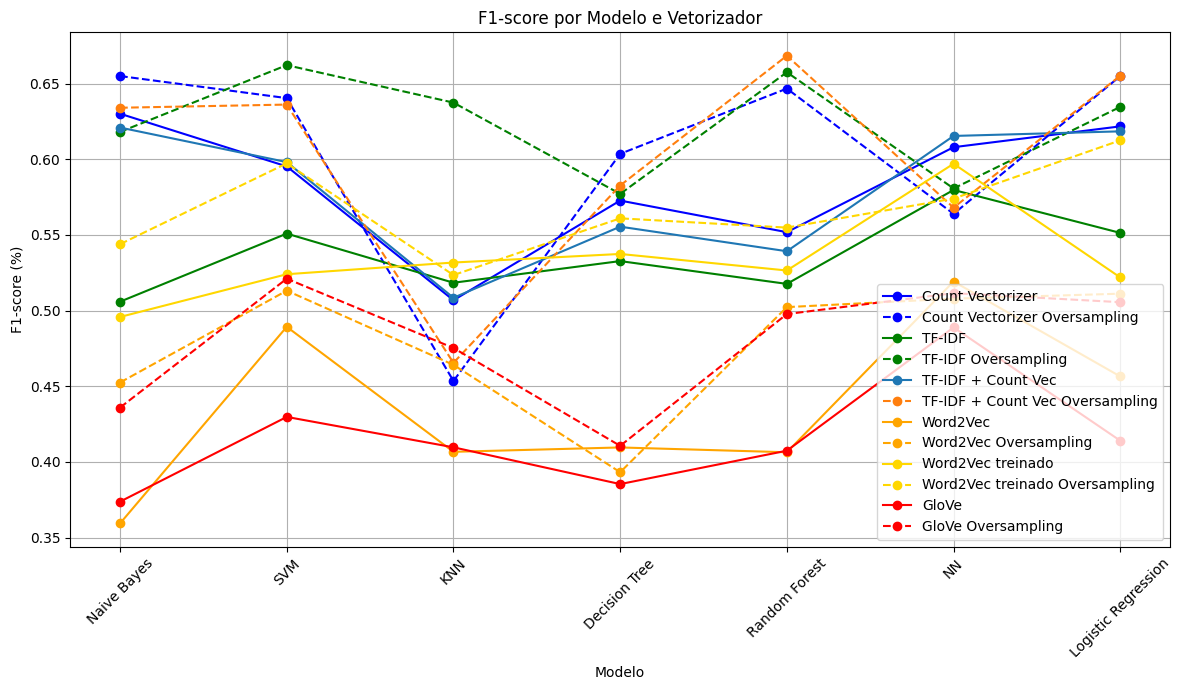

In [ ]:
modelos = ["Naive Bayes", "SVM", "KNN", "Decision Tree", "Random Forest", "NN", "Logistic Regression"]

cores = {
    "Count Vectorizer": "blue",
    "TF-IDF": "green",
    "Word2Vec": "orange",
    "Word2Vec treinado": "gold",
    "GloVe": "red",
}

tipo_linha = {
    False: '-',   
    True: '--'    
}

plt.figure(figsize=(12, 7))

for vetor_name, scores_dict in resultados.items():
    f1_scores = [scores_dict.get(modelo, np.nan) for modelo in modelos]

    oversample = 'Oversampling' in vetor_name
    base = vetor_name.replace(' Oversampling', '')
    
    cor = cores.get(base, None)
    estilo = tipo_linha[oversample]
    
    plt.plot(modelos, f1_scores, marker='o', label=vetor_name, color=cor, linestyle=estilo)

plt.title("F1-score por Modelo e Vetorizador")
plt.xlabel("Modelo")
plt.ylabel("F1-score (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
